  # 📌 Klasifikasi Wine Quality dengan KNN
  Pada tugas ini, kita akan menggunakan Wine Quality Dataset. Dataset bisa diakses melalui link berikut:\
  🔗 https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

  Tujuan utama dari tugas ini adalah membangun model K-Nearest Neighbors (KNN) untuk mengklasifikasikan kualitas wine.

  Langkah-langkah yang harus dilakukan antara lain:
  1. Persiapan Dataset & Eksplorasi Awal
  - Memuat dataset, melihat struktur data dan distribusi label.
  2. Preprocessing
  - Memproses data agar siap untuk digunakan dalam membangun model.
  3. Eksperimen Model KNN
  - Bangun model KNN dengan mencoba beberapa nilai k (misalnya 3, 5, dan 7) serta dua metric jarak (seperti Euclidean dan Manhattan).
  - Eksperimen ini bertujuan untuk membandingkan performa KNN dengan parameter yang berbeda.
  4. Evaluasi Model
  - Hitung metrik evaluasi seperti Accuracy, Precision, Recall, F1-Score, serta visualisasikan Confusion Matrix.
  5. Analisis & Kesimpulan
  - Bandingkan hasil antar eksperimen yang telah dilakukan dan berikan kesimpulan.

# 0. Import Library & Project Setup

In [132]:
%pip install -U feature-engine

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             classification_report,
                             precision_recall_fscore_support,
                             confusion_matrix,
                             ConfusionMatrixDisplay)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
from sklearn.preprocessing import StandardScaler, PowerTransformer
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from itertools import product

# 1. Persiapan Dataset & Eksplorasi Awal

Pertama - tama saya perlu membaca atau load dataset ke notebook dengan menggunakan library pandas. Setelah di load, dataset yang tadi nya csv akan menjadi variabel dengan tipe dataframe yang mana ini akan sangat berguna untuk mengolahnya dan memvisualisasikannya.

---

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
data = pd.read_csv('/content/drive/MyDrive/College/Machine Learning/dataset/WineQT.csv')

display(data.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


---

Selanjutnya disini saya ingin melihat tipe data pada setiap fitur dan berapa banyak data nya. Untuk melakukan itu, disini saya menggunakan fungsi `.info()` yang sudah ada di python. Selain melihat banyak data dan tipe data pada setiap fitur, kita juga bisa mengetahui berapa banyak non-null / tidak kosong, berapa banyak fiturnya, nama fitur, dan total memory yang terpakai.

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Disini kita bisa melihat kalau tipe data dari seluruh fiturnya yaitu float64, kecuali untuk quality dan Id, karena quality itu isinya rating dari kualitas minuman dan id itu isinya yaitu bilangan bulat dari 1, 2, 3, ... dan seterusnya.

---

Untuk selanjutnya, kita bisa mengecek ada berapa nilai yang null / missing value pada dataset. Untuk mengecek missing value perfitur, kita bisa menggunakan fungsi `.isnull()` dan untuk menjumlahkannya kita bisa menggunakan fungsi `.sum()`

In [137]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Dan disini terlihat di data nya tidak terdapat missing value satupun, jadi kita tidak perlu khawatir untuk masalah missing value.

---

Selanjutnya, disini saya mengecek ada berapa banyak data yang duplikat menggunakan fungsi `.duplicated()` untuk mengeceknya dan fungsi `.sum()` untuk menjumlahkannya.

In [138]:
data.duplicated().sum()

np.int64(0)

Dan kabar baik disini tidak terdapat data duplikat ฅ^>⩊<^ ฅ

---

Selanjutnya, disini saya melakukan visualisasi terkait distribusi pada data targetnya menggunakan fungsi `.value_counts()` untuk menghitung banyak data per label class nya dan memvisualisasikannya menggunakan grafik batang dari library matplotlib.

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


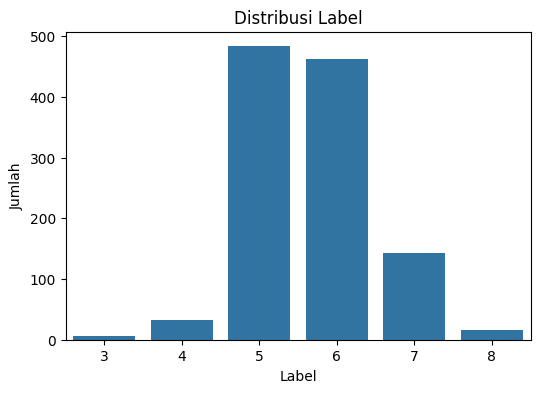

In [139]:
print(data['quality'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=data)
plt.title("Distribusi Label")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

( ˶°ㅁ°) !! Dan kabar buruknya, disini kita bisa melihat kalau persebaran datanya sangat berat untuk kelas di tengah (5 dan 6) dan sangat kecil untuk kelas (7, 4, 8, 3). Sehingga kita perlu melakukan resampling untuk menyeimbangkan banyak data per kelas nya agar model nanti tidak cenderung di beberapa kelas saja.

<p align="align-left">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFrcLXlNGbZntQjLWfOg8RdQiWqUUO-UrgCA&s" width="540" alt="Urara Dance">
</p>

---

Untuk selanjutnya disini saya mengecek korelasi antar fitur menggunakan fungsi `.corr()` dan memvisualisasikannya menggunakan heatmap dari matplotlib.

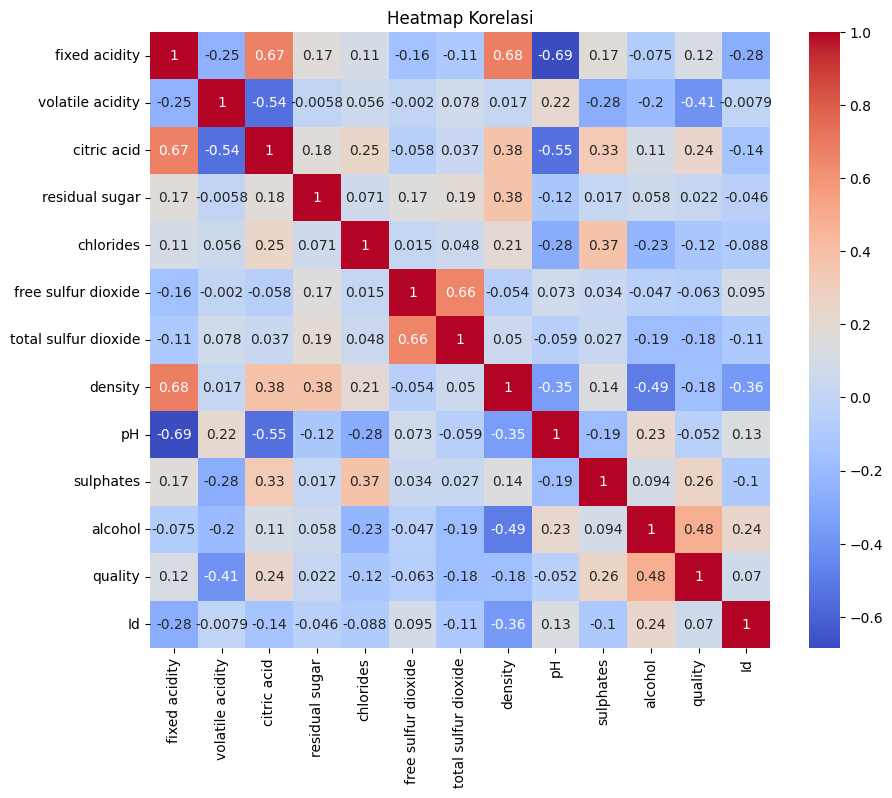

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.title("Heatmap Korelasi")
plt.show()

Disini kita bisa kalau fitur seperti volatile acidity, citric acid, chlorides, total sulfure dioxide, density, sulphates, alcohol memiliki korelasi yang tinggi terhadap target. Sedangkan yang lain korelasi nya lemah terhadap target. Seharusnya disini saya melakukan drop untuk fitur yang korelasinya lemah tersebut, tapi dikarenakan dataset nya sedikit maka saya tetap menggunakan fitur tersebut. (Sebenarnya bisa dilakukan drop untuk data yang korelasi nya sedikit dan nanti dilakukan feature engineering atau menggunakan libarary autofeat untuk menambah dan memfilter fiturnya secara otomatis, tapi kyk nya kalau pakai autofeat bakal lama, jadinya di skip saja (˶˃⤙˂˶))

---

Untuk selanjutnya disini saya melakukan pengecekan terhadap outlier pada datanya dengan menggunakan boxplot dan memvisualkannya menggunakan matplotlib.

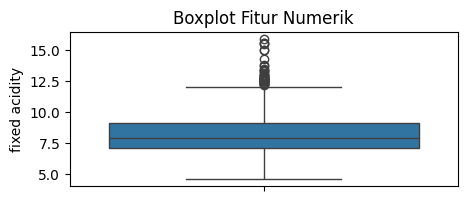

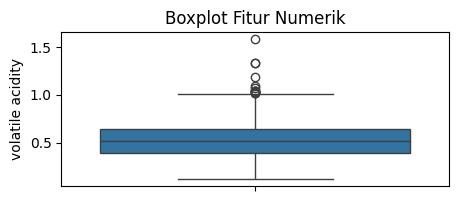

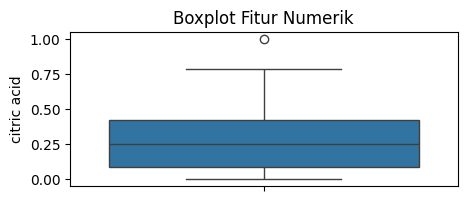

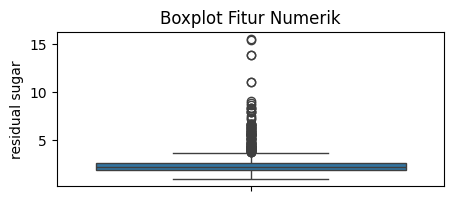

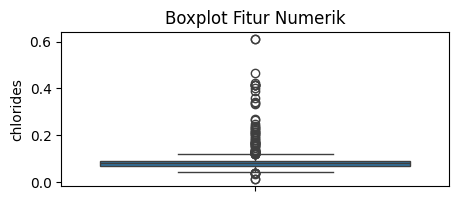

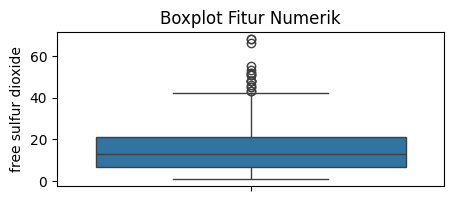

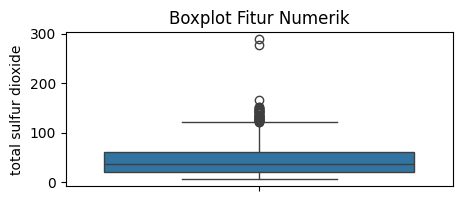

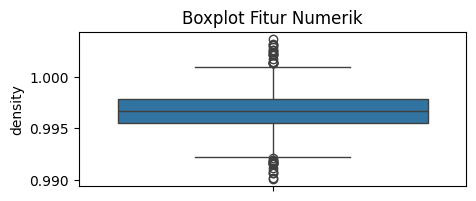

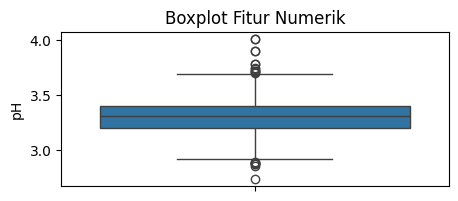

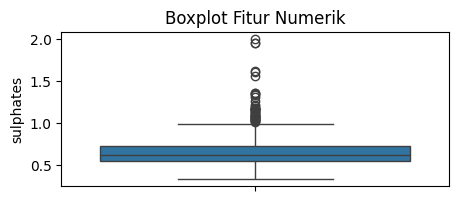

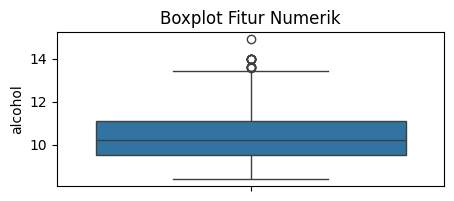

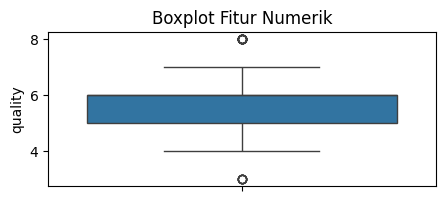

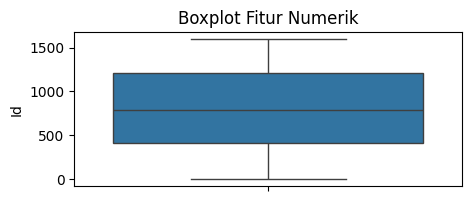

In [141]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

for feature in num_cols:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=data[feature])
    plt.title("Boxplot Fitur Numerik")
    plt.show()

Disini terlihat lumayan banyak outlier pada beberapa fiturnya dan ini akan menjadi pr dikarenakan metode seperti kNN dan yang berbasis jarak lainnya itu sangat sensitif outlier. Life is not daijoubu part 2...

---

Selanjutnya saya ingin melihat distribusi pada data fitur yang akan di train nanti dengan menggunakan histogram dan memvisualisasikannya dengan menggunakan matplotlib.

In [142]:
X = data.drop(['quality', 'Id'], axis=1)
y = data['quality']

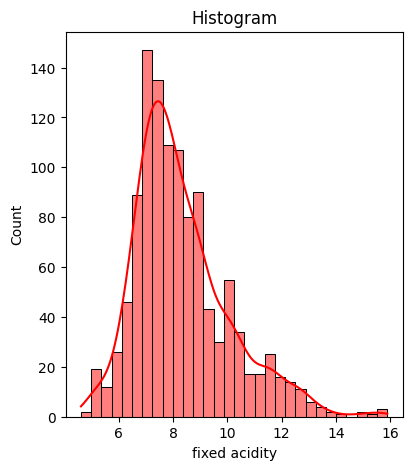

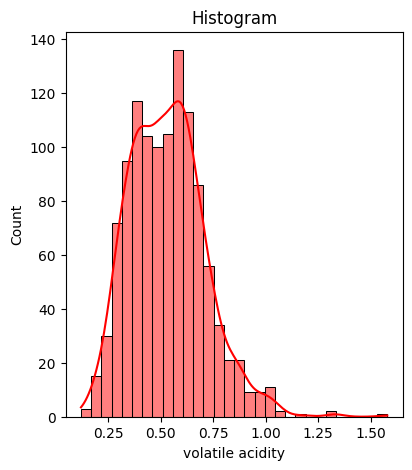

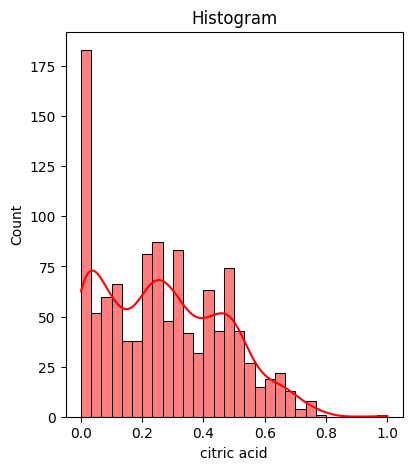

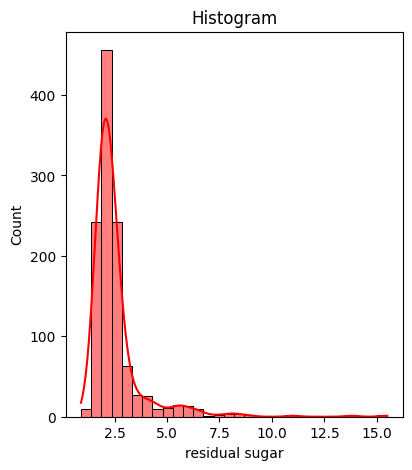

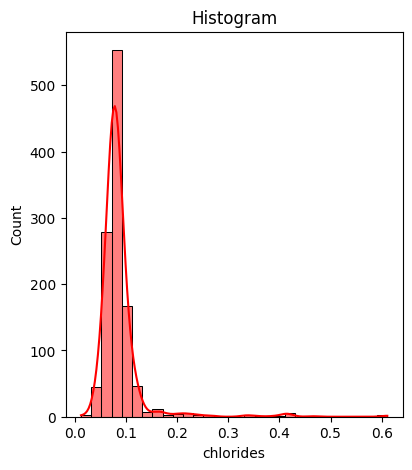

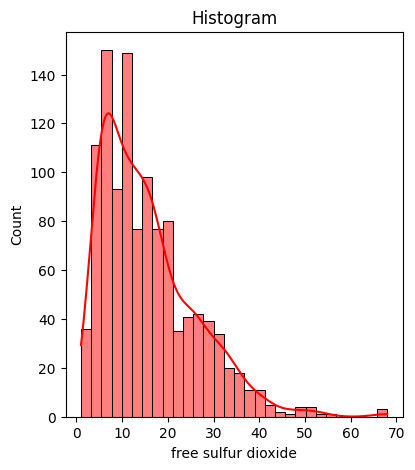

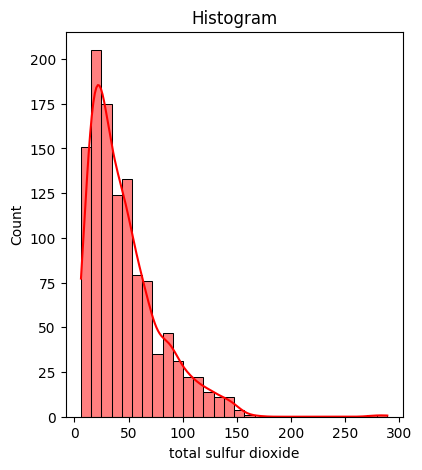

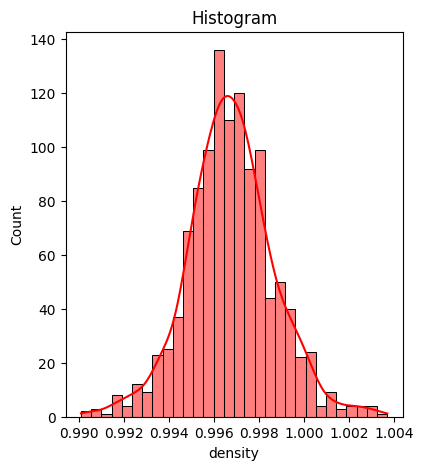

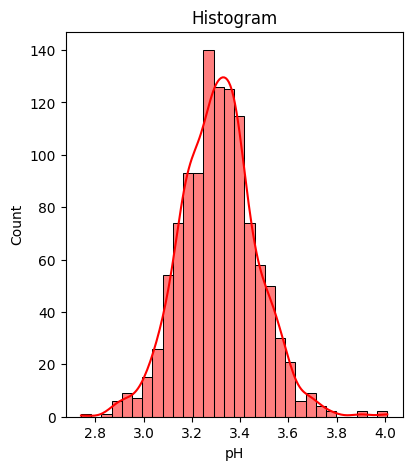

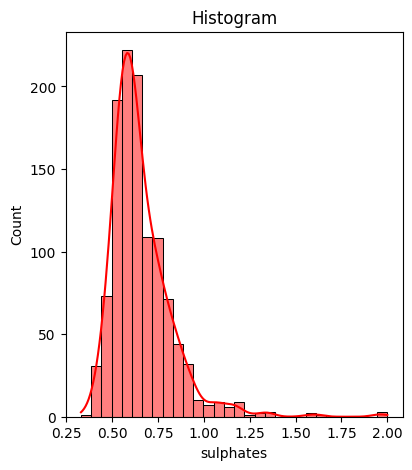

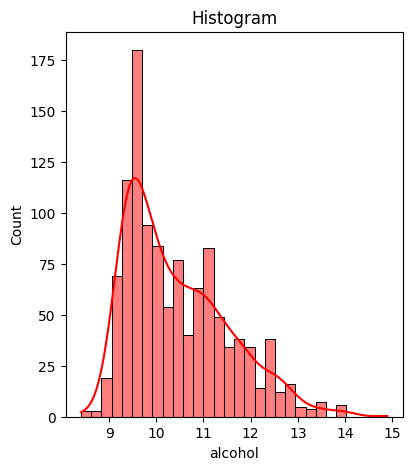

In [143]:
num_cols = X.select_dtypes(include=np.number).columns.tolist()

for fitur in num_cols:
    plt.figure(figsize=(20,5))
    plt.subplot(1,4,1)
    sns.histplot(X[fitur], bins=30, color='r', kde=True)
    plt.title('Histogram')

Dan disini terlihat kalau distribusi pada tiap fiturnya itu tidak seimbang, sehingga kita perlu menanganinya nanti di preprocess. Life is not daijoubu part 3...

# 2. Preprocessing




Di preprocessing ini, dikarenakan saya disini membuat 2 skenario yaitu yang pertama ketika datanya tidak di preprocess sama sekali dan hanya melakukan normalisasi dengan StandardScaler saja dan yang kedua itu datanya di preprocess untuk menangani data imbalance pada target nya, menangani data outlier, dan menangani data yang distribusinya tidak seimbang.

---

Untuk yang ini, saya melakukan split data test dan train untuk yang skenarion data mentah nya.

In [144]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", len(X_train_raw))
print("Jumlah data uji:", len(X_test_raw))

display(y_train_raw.value_counts())
display(y_test_raw.value_counts())

Jumlah data latih: 914
Jumlah data uji: 229


,count
quality,
5,386
6,370
7,114
4,26
8,13
3,5


,count
quality,
5,97
6,92
7,29
4,7
8,3
3,1


## Absolute Dataset

Selanjutnya, setelah data mentahnya di split train dan test, kita perlu melakukan normalisasi untuk data X nya dengan menggunakan StandardScaler...

In [145]:
scaler = StandardScaler()

X_train_scaledr = pd.DataFrame(
    scaler.fit_transform(X_train_raw),
    columns=X_train_raw.columns, index=X_train_raw.index
)

X_test_scaledr = pd.DataFrame(
    scaler.transform(X_test_raw),
    columns=X_train_raw.columns, index=X_test_raw.index
)

display(X_train_scaledr.head(5))
print('\n')
display(X_test_scaledr.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
819,-0.012101,0.388684,-0.109113,-0.264324,0.609897,-0.643427,-0.236286,-0.299229,-1.039511,-0.731171,-0.608473
357,1.248615,-1.626485,0.761211,-0.600511,-0.208555,-0.942939,-0.719059,0.454173,-0.649907,2.263064,0.330960
385,0.675563,-0.394993,1.119580,3.181593,-0.468065,-1.042777,-0.869926,1.082009,-0.649907,0.420458,0.518847
1057,-1.559342,0.500638,-1.235414,-0.852652,-0.148669,-0.942939,-0.990619,-0.916601,2.272119,-0.212938,-0.326643
161,0.331731,0.332708,1.170776,-0.432418,4.981632,1.153646,1.061167,-0.173662,-1.753784,5.487625,-0.890303


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
96,-1.788563,-1.066716,-1.389001,-0.600511,-0.747536,1.153646,0.518047,-2.685004,2.401986,0.765947,3.337147
442,0.274426,0.388684,0.095670,-0.264324,0.210652,-1.042777,-0.930272,1.082009,0.324101,-0.961497,-1.266077
872,-0.413237,-0.562923,0.095670,-0.348371,-0.248480,0.354947,0.608567,0.234431,0.583837,-0.097775,-0.890303
764,-0.871679,-0.283039,-0.979437,-0.600511,-0.268442,2.451532,0.548220,-0.754410,-1.234313,-0.961497,-0.796360
570,-0.355932,0.388684,-1.389001,0.071863,-0.647725,-0.843102,-0.990619,-0.178894,0.453969,-0.558427,0.330960


## Nah i'd win!

Nah, untuk yang di preprocess, disini yang pertama dilakukan yaitu menangani outlier nya menggunakan Winsorizer. Untuk winsorizer nya disini saya menggunakan IQR, tail nya both (artinya outlier di kanan dan kiri sama sama dihandle), dan foldnya yaitu 1.5 (sebelumnya sudah mencoba dengan fold 3.0, tapi hasil di f1-score nya lebih rendah jika dibanding dengan 1.5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


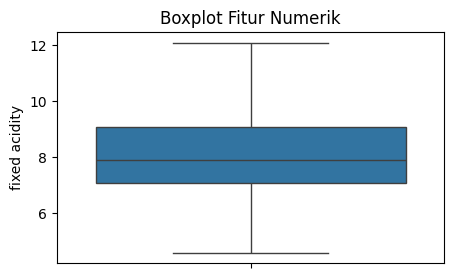

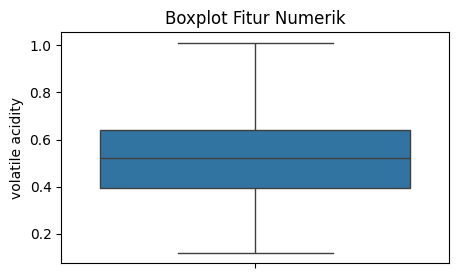

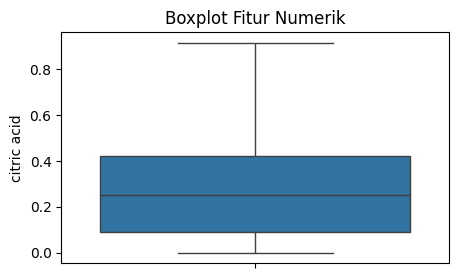

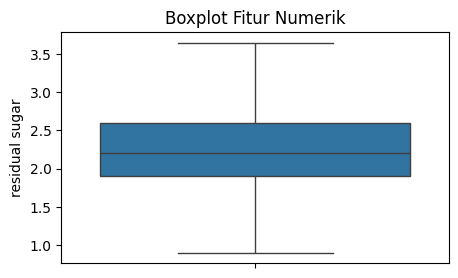

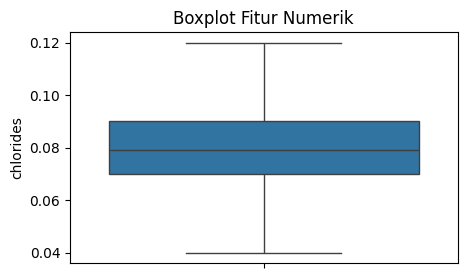

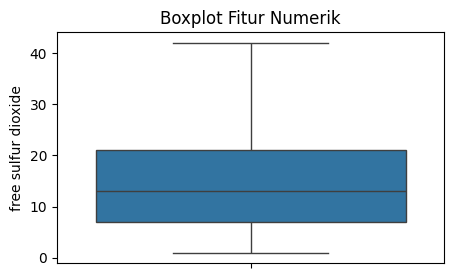

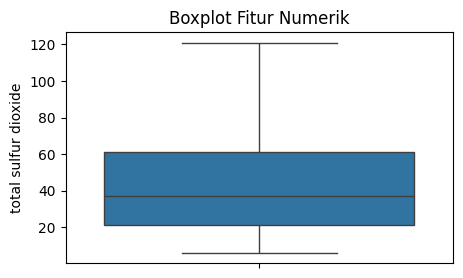

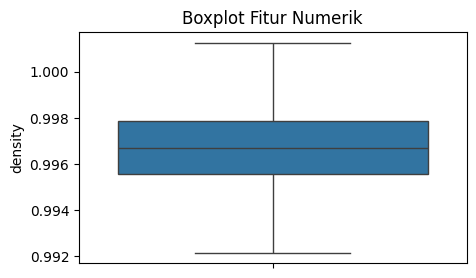

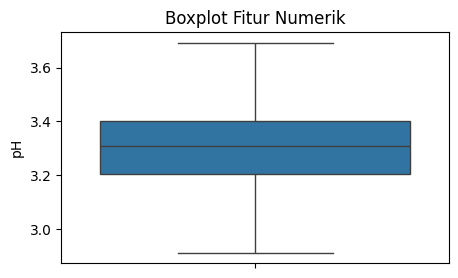

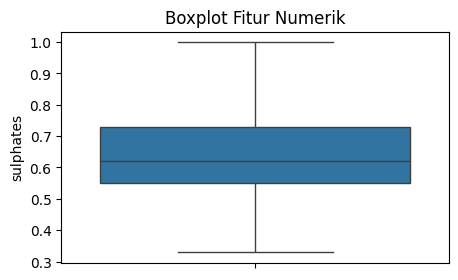

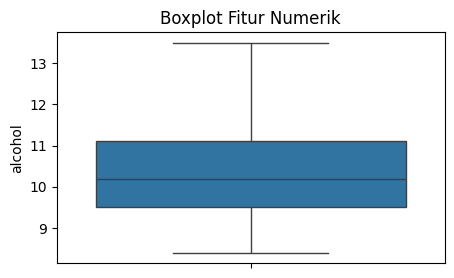

In [146]:
X_full = X.copy()
y_full = pd.Series(y, name=getattr(y, "name", "target"))

num_cols = X_full.select_dtypes(include=np.number).columns.tolist()

wz = Winsorizer(capping_method="iqr", tail="both", fold=1.5, variables=num_cols)
X_wz = wz.fit_transform(X_full)

display(X_wz.head(5))

num_cols = X_wz.select_dtypes(include=["int64", "float64"]).columns.tolist()

for feature in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=X_wz[feature], vert=True)
    plt.title("Boxplot Fitur Numerik")
    plt.show()

Dan yeaayy , disini kita bisa melihat kalau visual dari boxplot tidak menampilkan bulat bulat kecil di atas dan bawah.

---

Selanjutnya kita bisa melihat distribusi datanya dengan histogram, dan terlihat ada beberapa fitur yang dimana di batas kanan atau kiri nya itu lebih panjang dari sebelumnya, nah itu adalah efek dari winsorizer tadi.

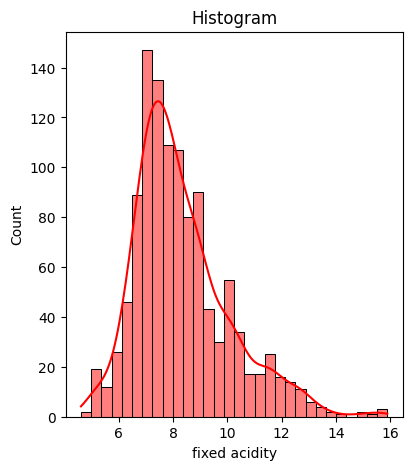

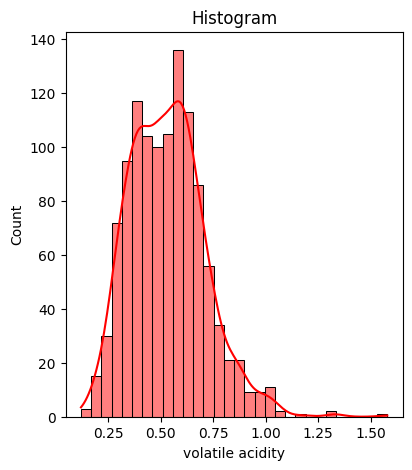

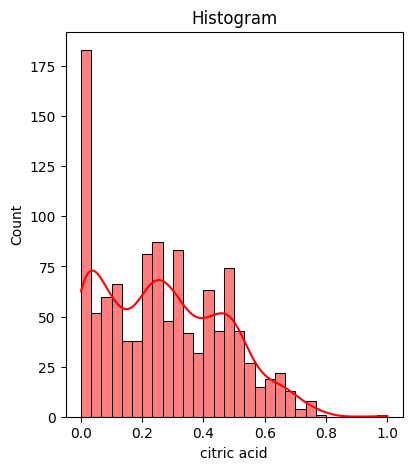

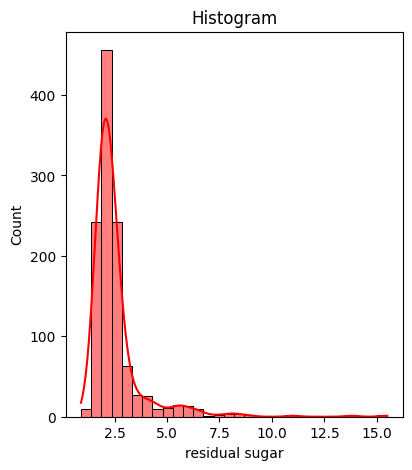

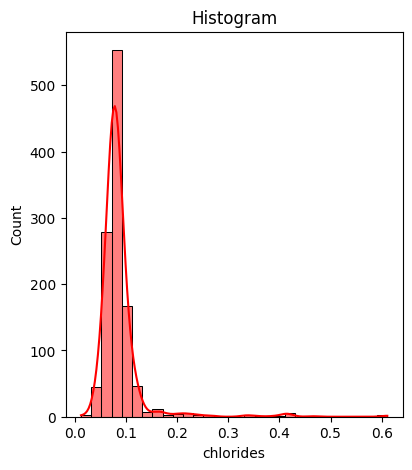

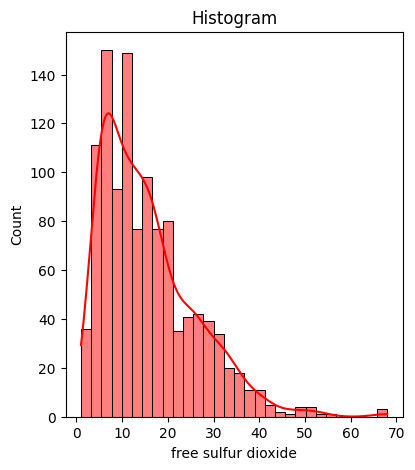

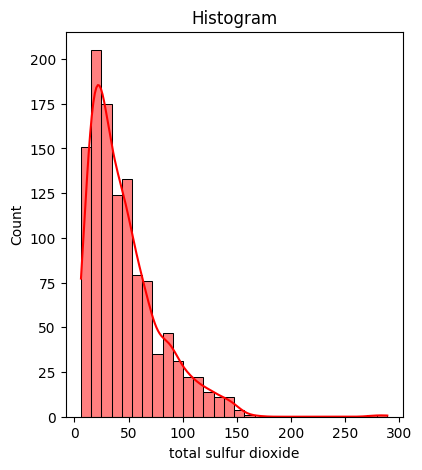

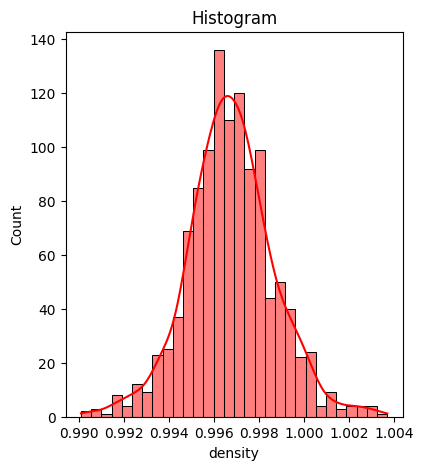

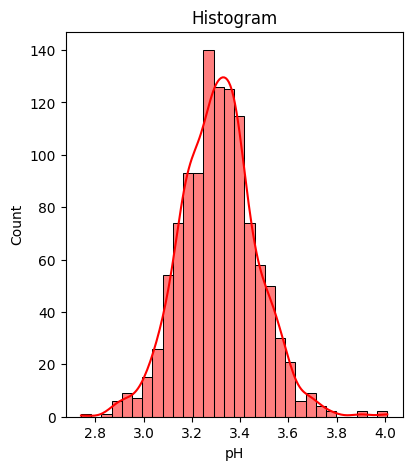

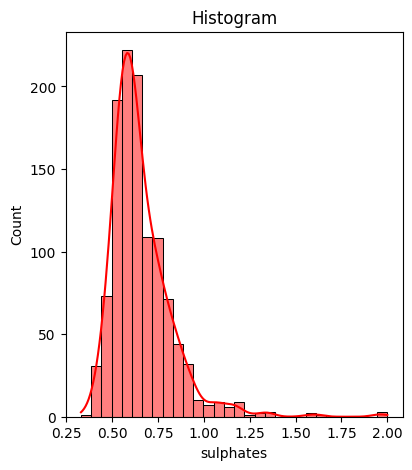

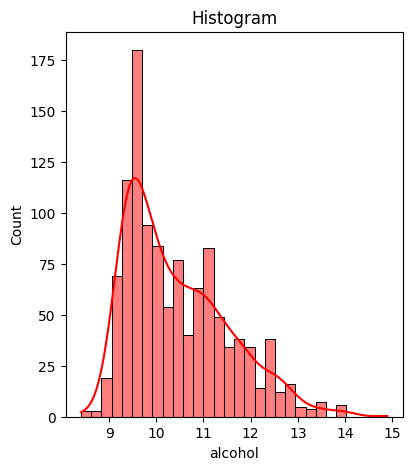

In [147]:
for fitur in num_cols:
    plt.figure(figsize=(20,5))
    plt.subplot(1,4,1)
    sns.histplot(X_full[fitur], bins=30, color='r', kde=True)
    plt.title('Histogram')

Selanjutnya kita akan menangani distribusi pada datanya agar lebih banyak di tengah dan bukan dipinggir menggunakan PowerTransformer dengan method yeo-johnson. Untuk kolom yang akan di PowerTransformer itu disini tidak semua kolom, tapi hanya beberapa saja seperti `fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol`. Untuk yang sisanya itu tidak dilakukan PowerTransformer karena persebaran datanya tidak separah itu.

In [148]:
ok_cols = ['fixed acidity',	'volatile acidity',	'citric acid',
           'residual sugar',	'chlorides',	'free sulfur dioxide',
           'total sulfur dioxide',	'sulphates',	'alcohol']

pt = PowerTransformer(method="yeo-johnson", standardize=True)
X_pt = X_wz.copy()
if ok_cols:
    X_pt[ok_cols] = pt.fit_transform(X_wz[ok_cols])

print(f"[INFO] Shape setelah winsor+YJ (full): {X_pt.shape}")

[INFO] Shape setelah winsor+YJ (full): (1143, 11)


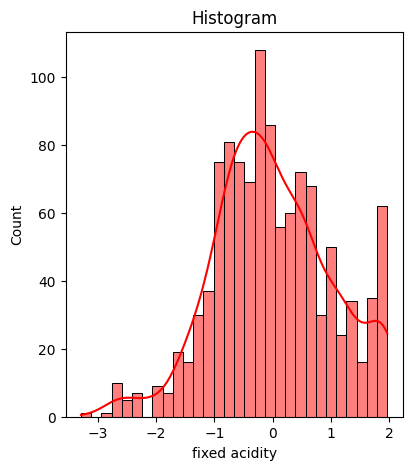

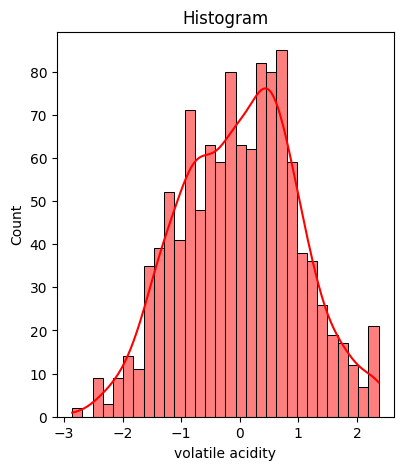

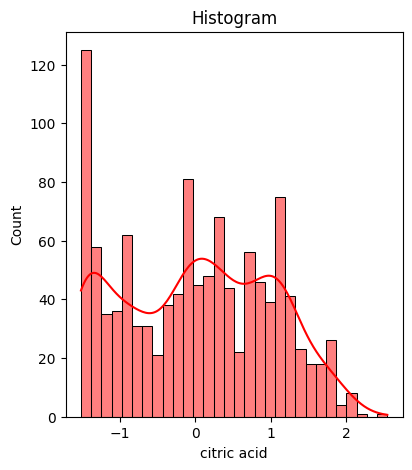

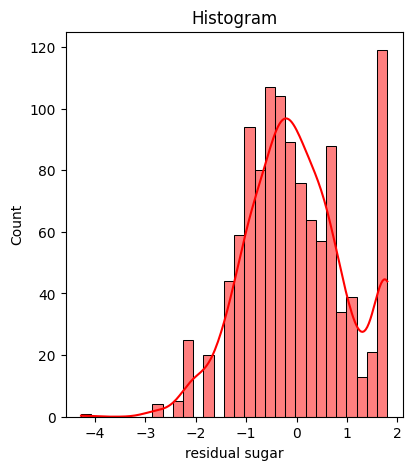

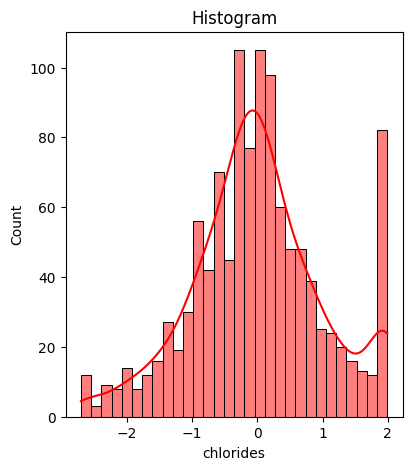

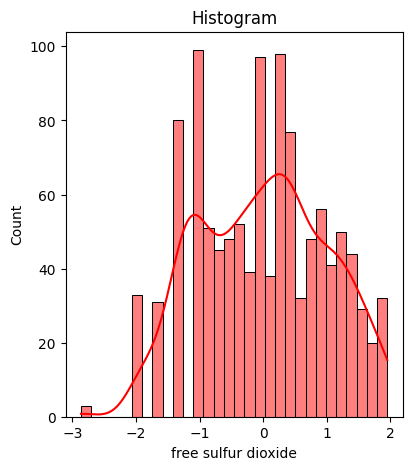

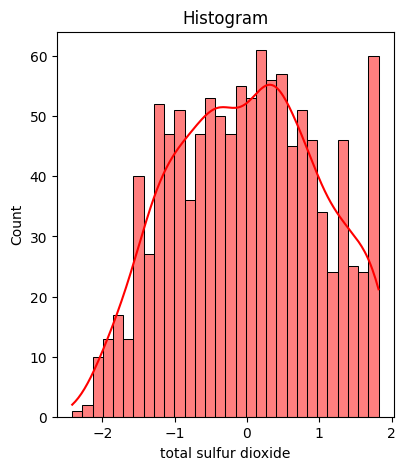

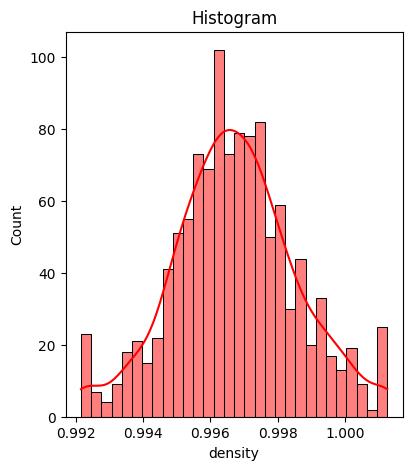

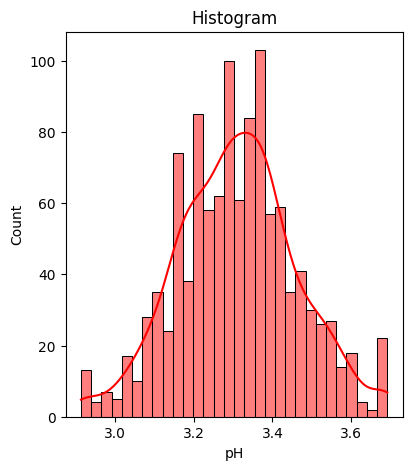

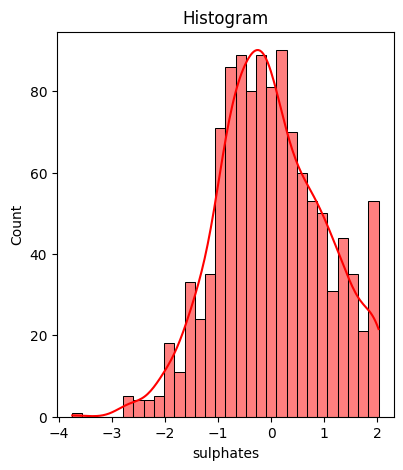

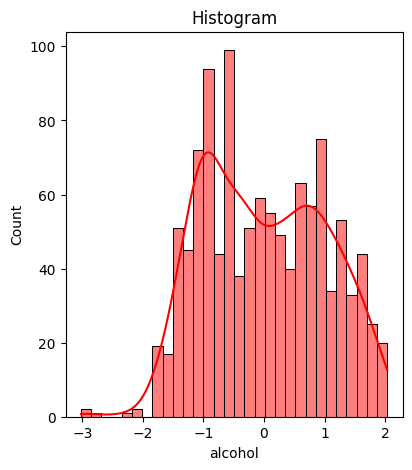

In [149]:
for fitur in num_cols:
    plt.figure(figsize=(20,5))
    plt.subplot(1,4,1)
    sns.histplot(X_pt[fitur], bins=30, color='r', kde=True)
    plt.title('Histogram')

Dan yeayy, disini kita bisa melihat perbedaan after dan before dilakukan PowerTransformer dan datanya sekarang lebih banyak ditengah daripada di tepi.

---

Selanjutnya kita perlu melakukan split untuk data test dan train dikarenakan preprocess selanjutnya yaitu menghandle imbalance data dengan menggunakan SMOTE.

In [150]:
X_train_prepro, X_test_prepro, y_train_prepro, y_test_prepro = train_test_split(
    X_pt, y_full, test_size=0.2, stratify=y_full, random_state=42
)

print("Jumlah data latih:", len(X_train_prepro))
print("Jumlah data uji:", len(X_test_prepro))

display(y_train_prepro.value_counts())
display(y_test_prepro.value_counts())

Jumlah data latih: 914
Jumlah data uji: 229


,count
quality,
5,386
6,370
7,114
4,26
8,13
3,5


,count
quality,
5,97
6,92
7,29
4,7
8,3
3,1


Oiya, sebelum kita menggunakan SMOTE, kita perlu menormalisasi datanya terlebih dahulu agar hasil yang didapat lebih baik daripada tidak menormalisasi nya dlu. Disini untuk normalisasi nya saya menggunakan `StandardScaler` sama seperti data mentah tadi.

In [151]:
scaler = StandardScaler()

X_train_prepro = pd.DataFrame(
    scaler.fit_transform(X_train_prepro),
    columns=X_train_prepro.columns, index=X_train_prepro.index
)

X_test_prepro = pd.DataFrame(
    scaler.transform(X_test_prepro),
    columns=X_train_prepro.columns, index=X_test_prepro.index
)

display(X_train_prepro.head(5))
print('\n')
display(X_test_prepro.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
819,0.149914,0.479767,0.001056,-0.046229,1.905713,-0.537246,0.056591,-0.309923,-1.062435,-0.896620,-0.535129
357,1.320827,-1.869627,0.818585,-0.910262,-0.150023,-1.090001,-0.720197,0.473608,-0.662971,2.030154,0.540985
385,0.836977,-0.336235,1.114682,1.786102,-0.954170,-1.322056,-1.073132,1.126550,-0.662971,0.748796,0.709707
1057,-2.078443,0.588139,-1.336790,-1.751949,0.023951,-1.090001,-1.430047,-0.951983,2.333017,-0.052420,-0.165359
161,0.509974,0.424862,1.155318,-0.447737,1.990171,1.189870,1.188949,-0.179334,-1.794788,2.030154,-0.954755


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
96,-2.535291,-1.128712,-1.551902,-0.910262,-1.920183,1.189870,0.806132,-2.487758,2.466172,1.104142,2.052070
442,0.452400,0.479767,0.207546,-0.046229,0.985187,-1.322056,-1.241025,1.126550,0.335692,-1.342032,-1.606655
872,-0.319777,-0.525536,0.207546,-0.240123,-0.268343,0.603115,0.876496,0.245078,0.602002,0.109973,-0.954755
764,-0.936918,-0.213050,-0.997951,-0.910262,-0.328217,1.882580,0.829926,-0.783306,-1.262168,-1.342032,-0.808851
570,-0.249019,0.479767,-1.551902,0.615806,-1.562467,-0.885677,-1.430047,-0.184776,0.468847,-0.592768,0.540985


Nah, selanjutnya kita menghandle data imbalance nya menggunakan SMOTE. SMOTE marupakan salah satu tools yang berguna untuk melakukan oversampling pada data yang akan di train. Sebelumnya saya juga mencoba untuk mengkombinasikannya dengan teknik undersampling menggunakan Tomek Links, tapi karena hasil sebelum Tomek Links dan sesudah itu sama saja maka tidak saya pakai untuk yang saat ini, hanya memakai SMOTE saja. Untuk konfigurasi SMOTE nya disini saya menggunakan sampling strategy nya auto supaya perbandngannya nanti saat di resampling itu 1:1.

In [152]:
def smote_only_to_df(X_df, y, k_max, random_state=7, sampling_strategy="auto"):
    y_sr = pd.Series(y)
    vc_before = y_sr.value_counts().sort_index()
    min_count = int(vc_before.min())
    if min_count < 2:
        raise ValueError("SMOTE membutuhkan >= 2 sampel pada kelas terkecil.")

    smote_k = max(1, min(k_max, min_count - 1))
    print(f"[INFO] SMOTE.k_neighbors = {smote_k} (min_class_count = {min_count})")

    strategy = sampling_strategy
    n_classes = vc_before.shape[0]
    if isinstance(strategy, float) and n_classes > 2:
        counts = vc_before.copy()
        maj = int(counts.max())
        target_min = int(np.floor(maj * strategy))
        strategy = {cls: max(cnt, target_min) for cls, cnt in counts.items() if cnt < maj}
        print(f"[INFO] sampling_strategy(float) → dict (multiclass): target_min={target_min}, dict={strategy}")

    smote = SMOTE(k_neighbors=smote_k, sampling_strategy=strategy, random_state=random_state)
    X_sm, y_sm = smote.fit_resample(X_df.values, y_sr.values)

    X_out = pd.DataFrame(X_sm, columns=X_df.columns)
    y_out = pd.Series(y_sm, name=y_sr.name if y_sr.name else "target")

    print("\n[Distribusi kelas] sebelum SMOTE:")
    print(vc_before)
    print("\nSetelah SMOTE:")
    print(y_out.value_counts().sort_index())
    print(f"\n[Shape] {X_df.shape} → {X_out.shape}")

    return X_out, y_out

minority_val = y_train_prepro.value_counts().min()
K = max(1, min(minority_val-1, 5))

X_train_sm, y_train_sm = smote_only_to_df(
    X_train_prepro, y_train_prepro, K, random_state=7, sampling_strategy="auto"
)

display(X_train_sm.head())
print(y_train_sm.head())

[INFO] SMOTE.k_neighbors = 4 (min_class_count = 5)

[Distribusi kelas] sebelum SMOTE:
quality
3      5
4     26
5    386
6    370
7    114
8     13
Name: count, dtype: int64

Setelah SMOTE:
quality
3    386
4    386
5    386
6    386
7    386
8    386
Name: count, dtype: int64

[Shape] (914, 11) → (2316, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.149914,0.479767,0.001056,-0.046229,1.905713,-0.537246,0.056591,-0.309923,-1.062435,-0.896620,-0.535129
1,1.320827,-1.869627,0.818585,-0.910262,-0.150023,-1.090001,-0.720197,0.473608,-0.662971,2.030154,0.540985
2,0.836977,-0.336235,1.114682,1.786102,-0.954170,-1.322056,-1.073132,1.126550,-0.662971,0.748796,0.709707
3,-2.078443,0.588139,-1.336790,-1.751949,0.023951,-1.090001,-1.430047,-0.951983,2.333017,-0.052420,-0.165359
4,0.509974,0.424862,1.155318,-0.447737,1.990171,1.189870,1.188949,-0.179334,-1.794788,2.030154,-0.954755


0    5
1    7
2    6
3    4
4    6
Name: quality, dtype: int64


Dan yeayy, kita telah selesai melakukan oversampling pada data trainnya, dan kini banyak data pada tiap label sudah setara dan tidak diberatkan di beberapa kelas saja.

# 3. Eksperimen Model KNN


<p align="align-left">
  <img src="https://media1.tenor.com/m/mfD0lDWfbaMAAAAd/umamusume-season-2.gif" width="320" alt="Urara Dance">
</p>
training time...

---

Untuk di experimen modelnya, disini saya mengatur keduanya sama sama mencoba beberapa parameter yang berbeda, diantaranya seperti:
- menggunakan beberapa k_values: 1, 5, 9, 13, 17, 21
- menggunakan beberapa metric yaitu seperti manhattan, euclidean, minkowski (p=3), chebyshev, dan mahalanobis (metric ini dipilih dikarenakan cocok jika menggunakan StandardScaler untuk normalisasinya)
- lalu selanjutnya untuk weight disini saya menggunakan uniform dan distance

## Rawrr Data

untuk data mentah...

In [153]:
k_values = [1, 5, 9, 13, 17, 21]
weights  = ["uniform", "distance"]

P_MINKOWSKI = 3
P_WMINKOWSKI = 3

# Untuk Mahalanobis: hitung inverse covariance di ruang yang sudah distandardize
C = np.cov(X_train_scaledr, rowvar=False)
C = C + 1e-12 * np.eye(C.shape[0])
VI = np.linalg.pinv(C)

metrics_config = [
    ("manhattan",   {"metric": "manhattan"}),
    ("euclidean",   {"metric": "euclidean"}),
    (f"minkowski_p{P_MINKOWSKI}", {"metric": "minkowski", "p": P_MINKOWSKI}),
    ("chebyshev",   {"metric": "chebyshev"}),
    ("mahalanobis", {"metric": "mahalanobis", "metric_params": {"VI": VI}})
]

models_dictr = {}
y_pred_dictr = {}
created_var = []

for k, (suffix_metric, params), w in product(k_values, metrics_config, weights):
    model = KNeighborsClassifier(n_neighbors=k, weights=w, **params)
    model.fit(X_train_scaledr, y_train_raw)
    preds = model.predict(X_test_scaledr)

    var_name = f"y_pred_k{k}_{suffix_metric}_{w}"
    globals()[var_name] = preds
    models_dictr[var_name] = model
    y_pred_dictr[var_name] = preds
    created_var.append(var_name)

    print(f"Created variable: {var_name}")

print("\nSummary of y_pred variables:")
for v in created_var:
    print("-", v)

Created variable: y_pred_k1_manhattan_uniform
Created variable: y_pred_k1_manhattan_distance
Created variable: y_pred_k1_euclidean_uniform
Created variable: y_pred_k1_euclidean_distance
Created variable: y_pred_k1_minkowski_p3_uniform
Created variable: y_pred_k1_minkowski_p3_distance
Created variable: y_pred_k1_chebyshev_uniform
Created variable: y_pred_k1_chebyshev_distance
Created variable: y_pred_k1_mahalanobis_uniform
Created variable: y_pred_k1_mahalanobis_distance
Created variable: y_pred_k5_manhattan_uniform
Created variable: y_pred_k5_manhattan_distance
Created variable: y_pred_k5_euclidean_uniform
Created variable: y_pred_k5_euclidean_distance
Created variable: y_pred_k5_minkowski_p3_uniform
Created variable: y_pred_k5_minkowski_p3_distance
Created variable: y_pred_k5_chebyshev_uniform
Created variable: y_pred_k5_chebyshev_distance
Created variable: y_pred_k5_mahalanobis_uniform
Created variable: y_pred_k5_mahalanobis_distance
Created variable: y_pred_k9_manhattan_uniform
Crea

## Domain Expansion!!

untuk data preprocess...

In [154]:
k_values = [1, 5, 9, 13, 17, 21]
weights  = ["uniform", "distance"]

P_MINKOWSKI = 3
P_WMINKOWSKI = 3

# Untuk Mahalanobis: hitung inverse covariance di ruang yang sudah distandardize
C = np.cov(X_train_scaledr, rowvar=False)
C = C + 1e-12 * np.eye(C.shape[0])
VI = np.linalg.pinv(C)

metrics_config = [
    ("manhattan",   {"metric": "manhattan"}),
    ("euclidean",   {"metric": "euclidean"}),
    (f"minkowski_p{P_MINKOWSKI}", {"metric": "minkowski", "p": P_MINKOWSKI}),
    ("chebyshev",   {"metric": "chebyshev"}),
    ("mahalanobis", {"metric": "mahalanobis", "metric_params": {"VI": VI}})
]

models_dictprepro = {}
y_pred_dictprepro = {}
created_var = []

for k, (suffix_metric, params), w in product(k_values, metrics_config, weights):
    model = KNeighborsClassifier(n_neighbors=k, weights=w, **params)
    model.fit(X_train_sm, y_train_sm)
    preds = model.predict(X_test_prepro)

    var_name = f"y_pred_k{k}_{suffix_metric}_{w}"
    globals()[var_name] = preds
    models_dictprepro[var_name] = model
    y_pred_dictprepro[var_name] = preds
    created_var.append(var_name)

    print(f"Created variable: {var_name}")

print("\nSummary of y_pred variables:")
for v in created_var:
    print("-", v)

Created variable: y_pred_k1_manhattan_uniform
Created variable: y_pred_k1_manhattan_distance
Created variable: y_pred_k1_euclidean_uniform
Created variable: y_pred_k1_euclidean_distance
Created variable: y_pred_k1_minkowski_p3_uniform
Created variable: y_pred_k1_minkowski_p3_distance
Created variable: y_pred_k1_chebyshev_uniform
Created variable: y_pred_k1_chebyshev_distance
Created variable: y_pred_k1_mahalanobis_uniform
Created variable: y_pred_k1_mahalanobis_distance
Created variable: y_pred_k5_manhattan_uniform
Created variable: y_pred_k5_manhattan_distance
Created variable: y_pred_k5_euclidean_uniform
Created variable: y_pred_k5_euclidean_distance
Created variable: y_pred_k5_minkowski_p3_uniform
Created variable: y_pred_k5_minkowski_p3_distance
Created variable: y_pred_k5_chebyshev_uniform
Created variable: y_pred_k5_chebyshev_distance
Created variable: y_pred_k5_mahalanobis_uniform
Created variable: y_pred_k5_mahalanobis_distance
Created variable: y_pred_k9_manhattan_uniform
Crea

# 4. Evaluasi Model


Untuk evaluasi nya disini saya menggunakan 4 yaitu Accuracy, Precision, Recall, dan F1-Score (macro)

In [192]:
AVERAGE = "macro"

def evaluate_all_models(y_test, y_pred_dict, models_dict, average=AVERAGE):
    rows = []
    for name, preds in y_pred_dict.items():
        model = models_dict.get(name, None)

        k = metric = p = weights = None
        if model is not None:
            params  = model.get_params()
            k       = params.get("n_neighbors")
            metric  = params.get("metric")
            weights = params.get("weights")
            p       = params.get("p") if metric == "minkowski" else None

        acc  = accuracy_score(y_test, preds)
        prec = precision_score(y_test, preds, average=average, zero_division=0)
        rec  = recall_score(y_test, preds, average=average, zero_division=0)
        f1   = f1_score(y_test, preds, average=average, zero_division=0)

        rows.append({
            "name": name,
            "k": k,
            "metric": metric,
            "p": p,
            "weights": weights,
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1
        })

    eval_df = pd.DataFrame(rows).sort_values("k", ascending=True).reset_index(drop=True)
    return eval_df

## Rawwrr model

In [193]:
eval_df_raw = evaluate_all_models(y_test_raw, y_pred_dictr, models_dictr, average=AVERAGE)
display(eval_df_raw)

metrics_to_show = ["f1", "accuracy", "precision", "recall"]

for m in metrics_to_show:
    best_idx  = eval_df_raw[m].idxmax()
    best_row  = eval_df_raw.loc[best_idx]
    best_name = best_row["name"]
    best_pred = y_pred_dictr[best_name]

    header_avg = f" ({AVERAGE})" if m in ["f1", "precision", "recall"] else ""
    print(f"\nBest by {m.upper()}{header_avg}")
    print(f"Model: {best_name}")
    print(f"Params: k={best_row['k']}, metric={best_row['metric']}, p={best_row['p']}, weights={best_row['weights']}")
    print(f"Score {m}: {best_row[m]:.4f}")

    print("Confusion matrix:")
    class_names = np.unique(np.concatenate([np.asarray(y_test_raw), np.asarray(best_pred)]))
    cm = confusion_matrix(y_test_raw, best_pred, labels=class_names)
    cm_df = pd.DataFrame(
        cm,
        index=[f"true_{c}" for c in class_names],
        columns=[f"pred_{c}" for c in class_names]
    )
    display(cm_df)

,name,k,metric,p,weights,accuracy,precision,recall,f1
0,y_pred_k1_manhattan_uniform,1,manhattan,NaN,uniform,0.659389,0.332680,0.333731,0.332987
1,y_pred_k1_manhattan_distance,1,manhattan,NaN,distance,0.659389,0.332680,0.333731,0.332987
2,y_pred_k1_euclidean_uniform,1,euclidean,NaN,uniform,0.650655,0.324562,0.322144,0.322645
3,y_pred_k1_euclidean_distance,1,euclidean,NaN,distance,0.650655,0.324562,0.322144,0.322645
4,y_pred_k1_minkowski_p3_uniform,1,minkowski,3.0,uniform,0.650655,0.320964,0.322144,0.321049
5,y_pred_k1_minkowski_p3_distance,1,minkowski,3.0,distance,0.650655,0.320964,0.322144,0.321049
6,y_pred_k1_chebyshev_uniform,1,chebyshev,NaN,uniform,0.659389,0.322605,0.325767,0.323714
7,y_pred_k1_chebyshev_distance,1,chebyshev,NaN,distance,0.659389,0.322605,0.325767,0.323714
8,y_pred_k1_mahalanobis_uniform,1,mahalanobis,NaN,uniform,0.641921,0.323893,0.310649,0.315504
9,y_pred_k1_mahalanobis_distance,1,mahalanobis,NaN,distance,0.641921,0.323893,0.310649,0.315504



Best by F1 (macro)
Model: y_pred_k21_manhattan_distance
Params: k=21, metric=manhattan, p=nan, weights=distance
Score f1: 0.3417
Confusion matrix:


,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8
true_3,0,0,1,0,0,0
true_4,0,0,4,3,0,0
true_5,0,0,74,22,1,0
true_6,0,0,16,73,3,0
true_7,0,0,2,13,14,0
true_8,0,0,0,1,2,0



Best by ACCURACY
Model: y_pred_k21_manhattan_distance
Params: k=21, metric=manhattan, p=nan, weights=distance
Score accuracy: 0.7031
Confusion matrix:


,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8
true_3,0,0,1,0,0,0
true_4,0,0,4,3,0,0
true_5,0,0,74,22,1,0
true_6,0,0,16,73,3,0
true_7,0,0,2,13,14,0
true_8,0,0,0,1,2,0



Best by PRECISION (macro)
Model: y_pred_k21_mahalanobis_distance
Params: k=21, metric=mahalanobis, p=nan, weights=distance
Score precision: 0.3603
Confusion matrix:


,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8
true_3,0,0,1,0,0,0
true_4,0,0,3,4,0,0
true_5,0,0,77,20,0,0
true_6,0,0,21,68,3,0
true_7,0,0,0,17,12,0
true_8,0,0,0,3,0,0



Best by RECALL (macro)
Model: y_pred_k21_manhattan_distance
Params: k=21, metric=manhattan, p=nan, weights=distance
Score recall: 0.3399
Confusion matrix:


,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8
true_3,0,0,1,0,0,0
true_4,0,0,4,3,0,0
true_5,0,0,74,22,1,0
true_6,0,0,16,73,3,0
true_7,0,0,2,13,14,0
true_8,0,0,0,1,2,0


## Domain Expansion!!

In [194]:
eval_df_prepro = evaluate_all_models(y_test_prepro, y_pred_dictprepro, models_dictprepro, average=AVERAGE)
display(eval_df_prepro)

metrics_to_show = ["f1", "accuracy", "precision", "recall"]

for m in metrics_to_show:
    best_idx  = eval_df_prepro[m].idxmax()
    best_row  = eval_df_prepro.loc[best_idx]
    best_name = best_row["name"]
    best_pred = y_pred_dictprepro[best_name]

    header_avg = f" ({AVERAGE})" if m in ["f1", "precision", "recall"] else ""
    print(f"\nBest by {m.upper()}{header_avg} ===")
    print(f"Model: {best_name}")
    print(f"Params: k={best_row['k']}, metric={best_row['metric']}, p={best_row['p']}, weights={best_row['weights']}")
    print(f"Score {m}: {best_row[m]:.4f}")

    print("Confusion matrix:")
    class_names = np.unique(np.concatenate([np.asarray(y_test_prepro), np.asarray(best_pred)]))
    cm = confusion_matrix(y_test_prepro, best_pred, labels=class_names)
    cm_df = pd.DataFrame(
        cm,
        index=[f"true_{c}" for c in class_names],
        columns=[f"pred_{c}" for c in class_names]
    )
    display(cm_df)

,name,k,metric,p,weights,accuracy,precision,recall,f1
0,y_pred_k1_manhattan_uniform,1,manhattan,NaN,uniform,0.628821,0.369540,0.397352,0.376312
1,y_pred_k1_manhattan_distance,1,manhattan,NaN,distance,0.628821,0.369540,0.397352,0.376312
2,y_pred_k1_euclidean_uniform,1,euclidean,NaN,uniform,0.606987,0.356789,0.384732,0.362270
3,y_pred_k1_euclidean_distance,1,euclidean,NaN,distance,0.606987,0.356789,0.384732,0.362270
4,y_pred_k1_minkowski_p3_uniform,1,minkowski,3.0,uniform,0.624454,0.376665,0.409574,0.383740
5,y_pred_k1_minkowski_p3_distance,1,minkowski,3.0,distance,0.624454,0.376665,0.409574,0.383740
6,y_pred_k1_chebyshev_uniform,1,chebyshev,NaN,uniform,0.589520,0.357732,0.399204,0.364246
7,y_pred_k1_chebyshev_distance,1,chebyshev,NaN,distance,0.589520,0.357732,0.399204,0.364246
8,y_pred_k1_mahalanobis_uniform,1,mahalanobis,NaN,uniform,0.598253,0.352263,0.380736,0.360053
9,y_pred_k1_mahalanobis_distance,1,mahalanobis,NaN,distance,0.598253,0.352263,0.380736,0.360053



Best by F1 (macro) ===
Model: y_pred_k1_minkowski_p3_uniform
Params: k=1, metric=minkowski, p=3.0, weights=uniform
Score f1: 0.3837
Confusion matrix:


,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8
true_3,0,0,1,0,0,0
true_4,0,2,3,2,0,0
true_5,3,4,67,19,3,1
true_6,0,2,21,58,9,2
true_7,0,2,2,6,15,4
true_8,0,0,0,2,0,1



Best by ACCURACY ===
Model: y_pred_k1_manhattan_uniform
Params: k=1, metric=manhattan, p=nan, weights=uniform
Score accuracy: 0.6288
Confusion matrix:


,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8
true_3,0,0,1,0,0,0
true_4,0,1,3,3,0,0
true_5,3,4,66,20,4,0
true_6,0,3,21,59,7,2
true_7,0,2,3,3,17,4
true_8,0,0,0,1,1,1



Best by PRECISION (macro) ===
Model: y_pred_k1_minkowski_p3_uniform
Params: k=1, metric=minkowski, p=3.0, weights=uniform
Score precision: 0.3767
Confusion matrix:


,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8
true_3,0,0,1,0,0,0
true_4,0,2,3,2,0,0
true_5,3,4,67,19,3,1
true_6,0,2,21,58,9,2
true_7,0,2,2,6,15,4
true_8,0,0,0,2,0,1



Best by RECALL (macro) ===
Model: y_pred_k17_mahalanobis_distance
Params: k=17, metric=mahalanobis, p=nan, weights=distance
Score recall: 0.4600
Confusion matrix:


,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8
true_3,0,1,0,0,0,0
true_4,0,3,1,3,0,0
true_5,6,12,60,15,3,1
true_6,1,13,13,36,21,8
true_7,0,2,0,4,19,4
true_8,0,0,0,0,1,2


# 5. Analisis & Kesimpulan

In [195]:
import warnings

warnings.filterwarnings("ignore")

## Raw Data

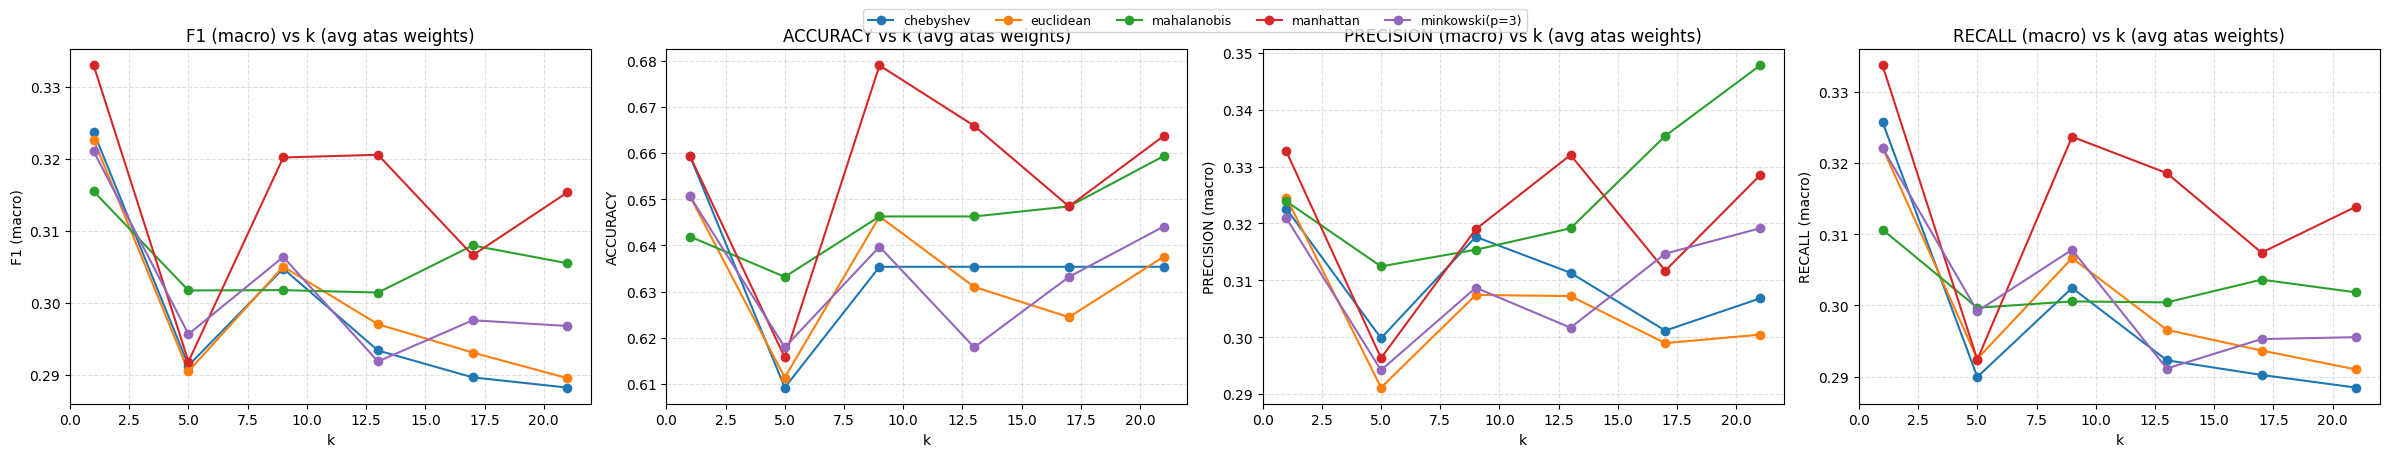

In [196]:
#@title kNN metric

df = eval_df_raw.copy()

try:
    AVG_LBL = f" ({AVERAGE})" if isinstance(AVERAGE, str) else ""
except NameError:
    AVG_LBL = ""

def _metric_with_params(row):
    m = str(row.get("metric", ""))
    if m == "minkowski":
        p = row.get("p", np.nan)
        if pd.notna(p):
            p_str = str(int(p)) if float(p).is_integer() else f"{p:.3g}"
            return f"minkowski(p={p_str})"
    return m

if "metric" in df.columns:
    df["metric_label"] = df.apply(_metric_with_params, axis=1)
else:
    df["metric_label"] = "metric"

if "weights" not in df.columns:
    df["weights"] = "uniform"

score_cols = [c for c in ["f1", "accuracy", "precision", "recall"] if c in df.columns]
if not score_cols:
    raise ValueError("Tidak ada kolom skor ('f1','accuracy','precision','recall') di eval_df.")

fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 4.5))

if len(score_cols) == 1:
    axes = [axes]

for ax, score in zip(axes, score_cols):
    g = (df.groupby(["k", "metric_label"], as_index=False)[score]
           .mean()
           .sort_values(["metric_label", "k"]))
    for m in g["metric_label"].unique():
        d = g[g["metric_label"] == m]
        ax.plot(d["k"], d[score], marker="o", label=m)
    ax.set_xlabel("k")
    ylab = score.upper() + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_ylabel(ylab)
    ax.set_title(f"{ylab} vs k (avg atas weights)")
    ax.grid(True, linestyle="--", alpha=0.4)

handles, labels = axes[0].get_legend_handles_labels()
if labels:
    fig.legend(handles, labels, loc="upper center", ncol=min(6, len(labels)), bbox_to_anchor=(0.5, 1.02), fontsize=9)
fig.tight_layout()
plt.show()

Nah, dari grafik ini kita bisa mengambil beberapa informasi penting seperti:
- Semua distance matric kNN disini mengalami drop yang lumayan ketika nilai k nya di antara 1 dan 5. Dan setelah nilai k lebih dari 5, mayoritas nilai score nya juga ikut bergerak naik. Ini merupakan pola klasik beberapa model: k kecil → overfit (skor awal tinggi), k sedang → smoothing berlebihan (drop), k agak besar → stabil.
- Distance Metric Manhattan paling konsisten unggul untuk F1, Accuracy, dan Recall di hampir semua k—terutama k≈9–13. Stabil dan relatif tahan outlier, menjadikan Manhattan sebagai kandidat baseline terbaik.
- Distance Metric Mahalanobis mengejar/unggul di Precision saat k besar (≈13–21), tetapi biasanya Recall turun (trade-off presisi vs sensitivitas). Hal ini masuk akal dikarenakan Mahalanobis “mengencangkan” ruang (pakai kovarians) sehingga vote jadi lebih selektif.
- Minkowski p=3 konsisten di bawah Manhattan: mungkin jika p>2 tampaknya tidak memberi keuntungan yang signifikan pada data ini.
- Chebyshev dan Euclidean merupakan distance metric yang paling lemah & paling fluktuatif: sensitif ke fitur dengan selisih maksimum. Tidak direkomendasikan menggunakan metric ini untuk data mentah.

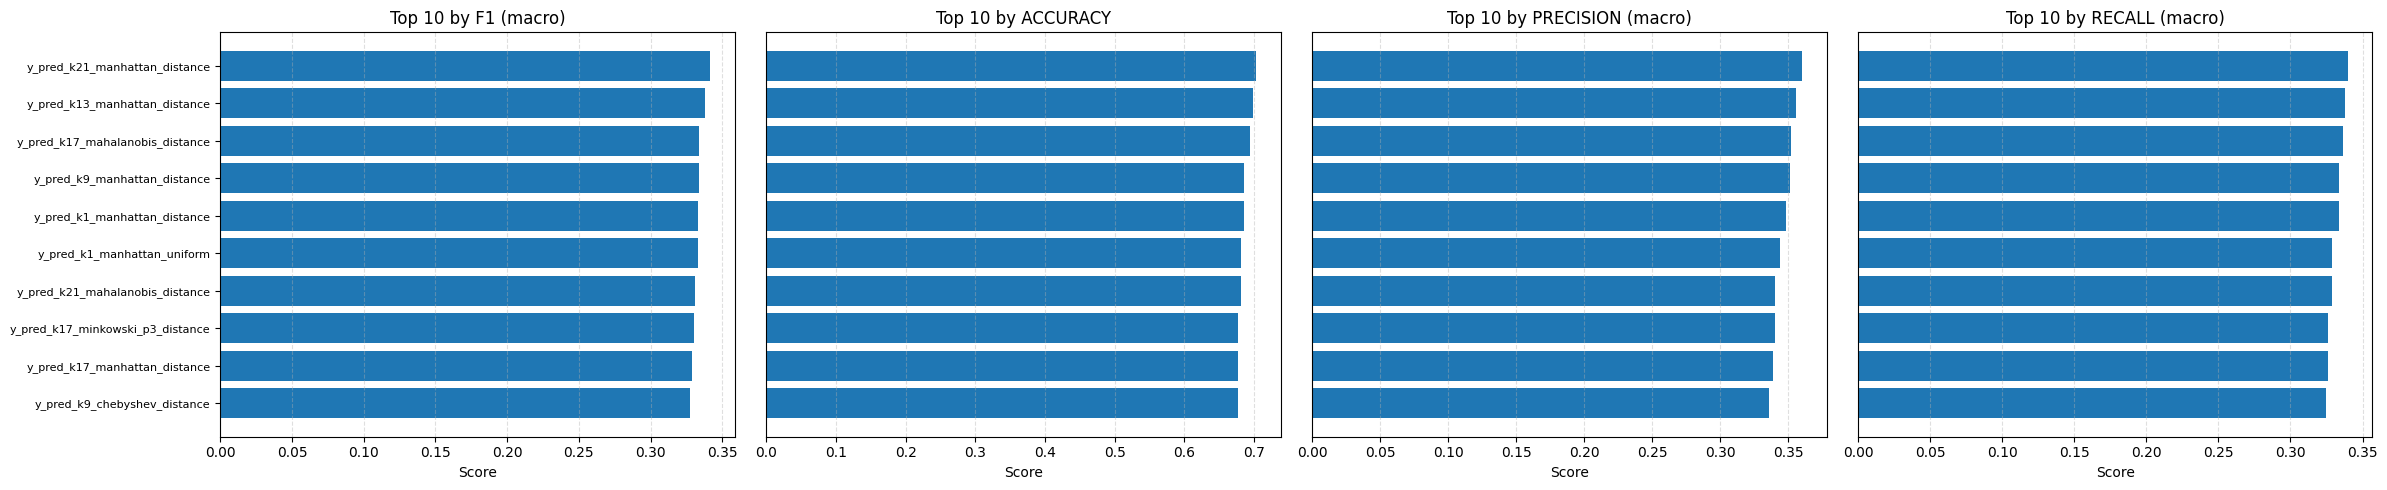

In [197]:
#@title top 10 score

TOPN = 10
fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 5))

if len(score_cols) == 1:
    axes = [axes]

for i, (ax, score) in enumerate(zip(axes, score_cols)):
    tmp = df.sort_values(score, ascending=False).head(TOPN).copy()
    ax.barh(tmp["name"][::-1], tmp[score][::-1])
    ttl = f"Top {TOPN} by {score.upper()}" + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_title(ttl)
    ax.set_xlabel("Score")
    if i == 0:
        ax.set_yticklabels(tmp["name"][::-1], fontsize=8)
    else:
        ax.set_yticks([])
    ax.grid(True, axis="x", linestyle="--", alpha=0.4)

fig.tight_layout()
plt.show()

Dari grafik ini bisa kita ambil beberapa informasi:
- Manhattan + weights=distance muncul paling sering di semua panel Top-10. Ini menegaskan temuan sebelumnya: L1 stabil di data yang sudah z-score.
- Mahalanobis + distance juga sering masuk, terutama ketika fokus Precision (lebih selektif → FP turun, tapi biasanya Recall sedikit turun).
- Minkowski p=3 hanya sesekali nongol; performanya tak melampaui Manhattan secara konsisten.
- Chebyshev muncul sporadis: bukan pilihan utama.
- Banyak entri Top-10 berada di k menengah–tinggi (≈9–21). Ini sejalan dengan grafik garis: setelah drop di k kecil/menengah, skor pulih di kisaran ini.
- Menariknya, ada juga k=1 yang ikut masuk Top-10 (khususnya F1). Itu pertanda ada separabilitas lokal yang kuat, tapi k=1 rentan overfit—jangan dijadikan final tanpa validasi silang.
- F1 & Accuracy: didominasi Manhattan-distance dengan k≈13–21 → paling seimbang presisi-recall, sekaligus akurasi tinggi.
- Precision: beberapa posisi teratas diisi Mahalanobis-distance pada k lebih besar (≈17–21). Cocok kalau prioritasmu meminimalkan FP.
- Recall: lagi-lagi Manhattan-distance relatif unggul dan stabil (menangkap lebih banyak positif).

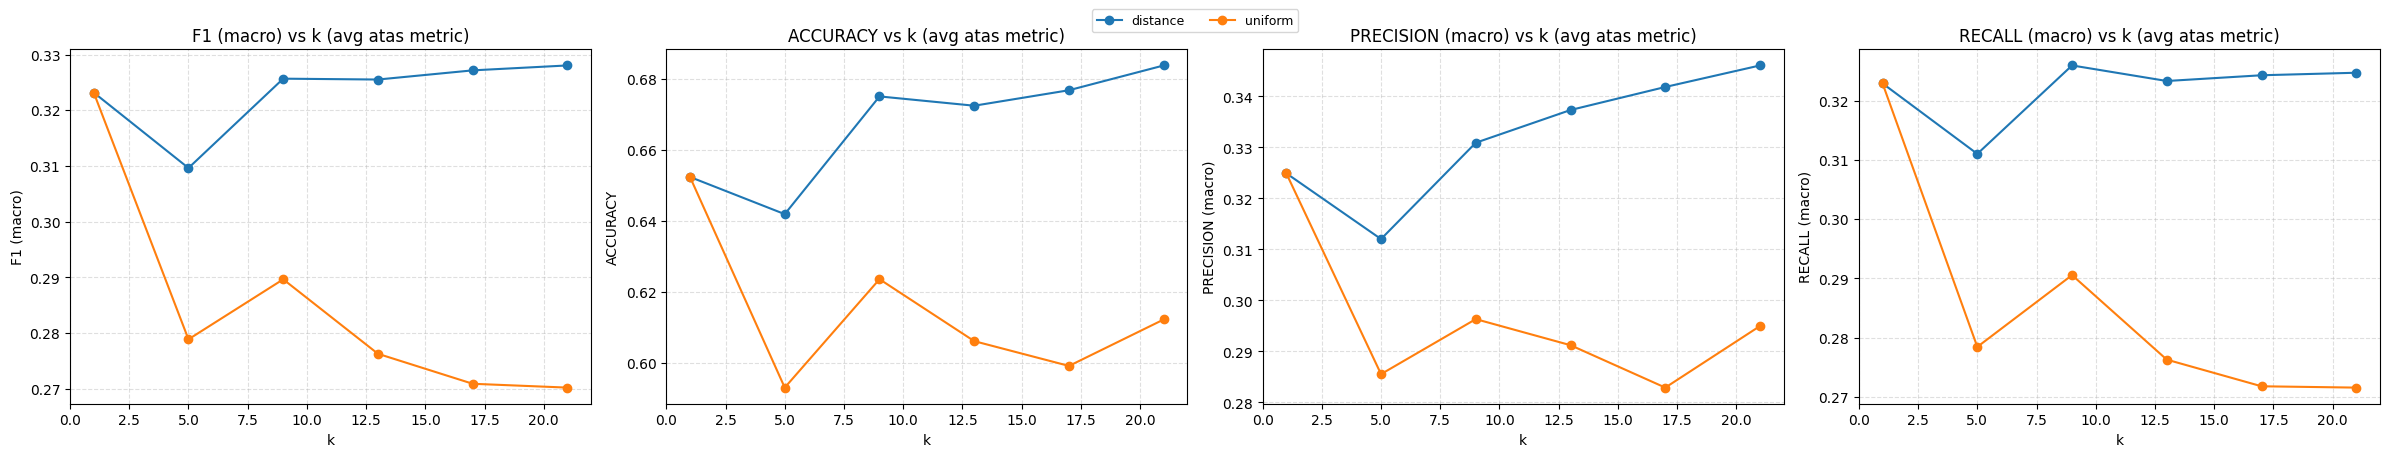

In [198]:
#@title Score vs k-weight

fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 4.5))
if len(score_cols) == 1:
    axes = [axes]

for ax, score in zip(axes, score_cols):
    g_w = (df.groupby(["k", "weights"], as_index=False)[score]
             .mean()
             .sort_values(["weights", "k"]))
    for w in g_w["weights"].unique():
        d = g_w[g_w["weights"] == w]
        ax.plot(d["k"], d[score], marker="o", label=w)
    ylab = score.upper() + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_xlabel("k")
    ax.set_ylabel(ylab)
    ax.set_title(f"{ylab} vs k (avg atas metric)")
    ax.grid(True, linestyle="--", alpha=0.4)

handles, labels = axes[0].get_legend_handles_labels()
if labels:
    fig.legend(handles, labels, loc="upper center",
               ncol=min(6, len(labels)), bbox_to_anchor=(0.5, 1.02), fontsize=9)
fig.tight_layout()
plt.show()

Dari grafik ini, bisa kita ambil informasi bahwa weight distance jauh lebih unggul mau berapapun k nya dibandingkan uniform. Ini juga sejalan dengan cara kerja weight distance yaitu dia menambah bobot lebih ke tetangga di dekatnya. Hal ini juga di dukung dengan penemuan kalau di dataset yang mentah tadi itu ditemukan sangat banyak outlier pada datanya.

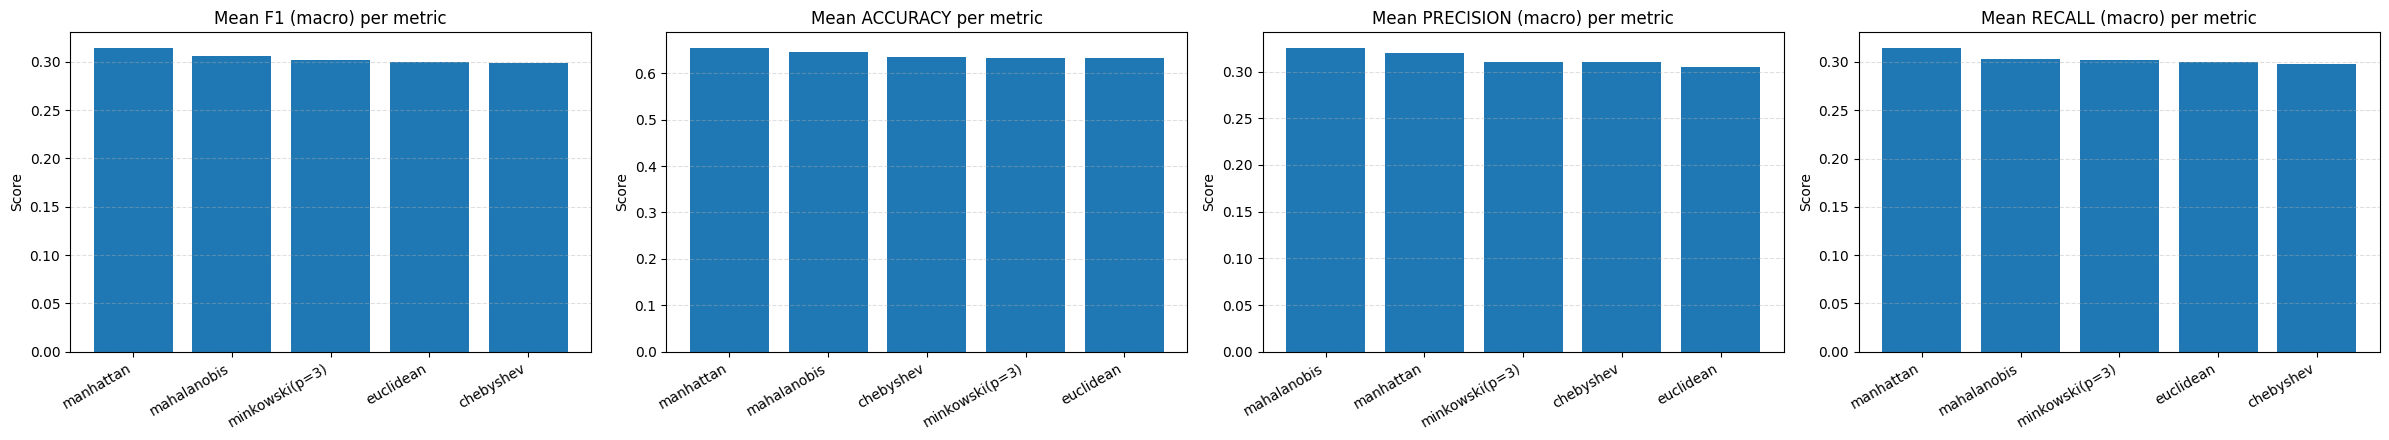

In [199]:
#@title mean score per metric

fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 4.5))
if len(score_cols) == 1:
    axes = [axes]

for ax, score in zip(axes, score_cols):
    avg_m = (df.groupby("metric_label")[score]
               .mean()
               .sort_values(ascending=False))
    ax.bar(avg_m.index, avg_m.values)
    ttl = f"Mean {score.upper()}" + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_title(ttl + " per metric")
    ax.set_ylabel("Score")
    ax.set_xticklabels(avg_m.index, rotation=30, ha="right")
    ax.grid(True, axis="y", linestyle="--", alpha=0.4)

fig.tight_layout()
plt.show()

Disini bisa kita lihat kalau yang paling mendominan di score evaluasi adalah metric manhattan. Ini juga tadi bisa kita lihat di visualiasi grafik yang pertama.

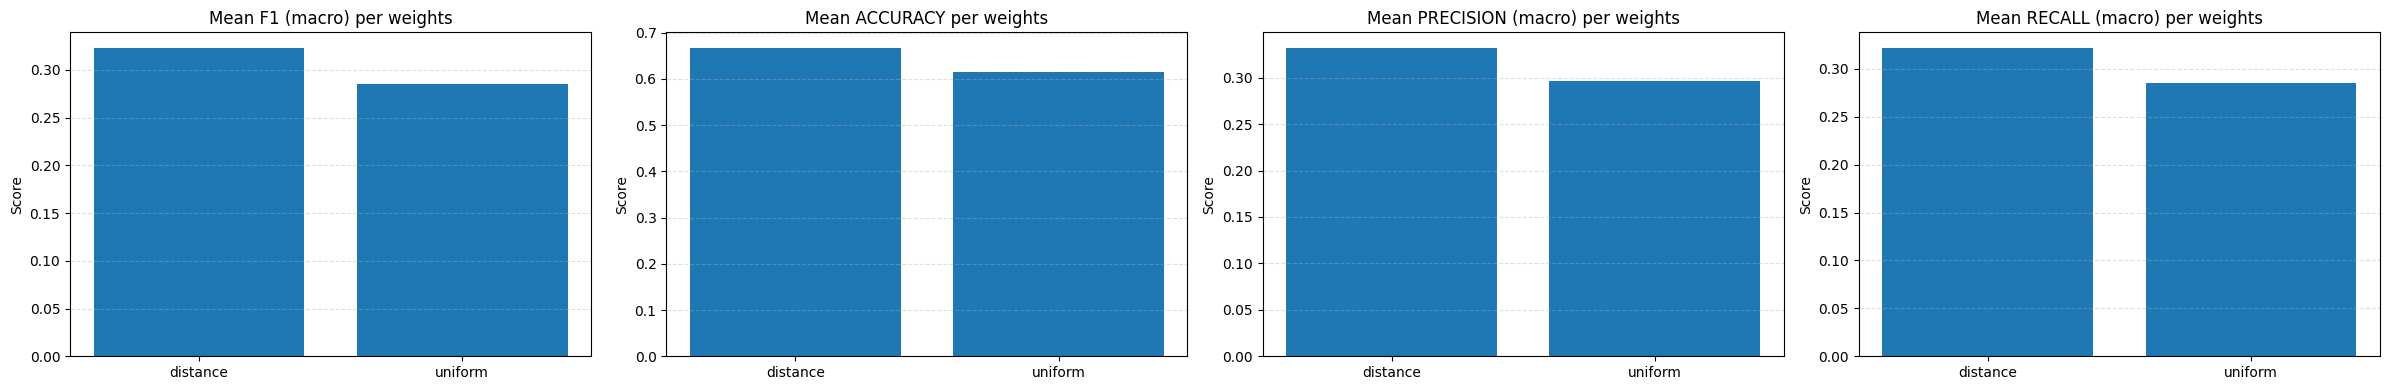

In [200]:
#@title mean score per weight

fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 4.0))
if len(score_cols) == 1:
    axes = [axes]

for ax, score in zip(axes, score_cols):
    avg_w = (df.groupby("weights")[score]
               .mean()
               .sort_values(ascending=False))
    ax.bar(avg_w.index, avg_w.values)
    ttl = f"Mean {score.upper()}" + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_title(ttl + " per weights")
    ax.set_ylabel("Score")
    ax.grid(True, axis="y", linestyle="--", alpha=0.4)

fig.tight_layout()
plt.show()

Untuk weight nya sendiri, dari beberapa hasil analisis tadi kita bisa melihat kalau distance itu jauh lebih banyak unggul di banding yang uniform, ini juga dikarenakan distance itu menambah bobot lebih banyak ke tetangga yang didekatnya sehingga sangat bagus jika dataset kita mempunyai banyak outlier seperti dataset ini.

## Prepro Data

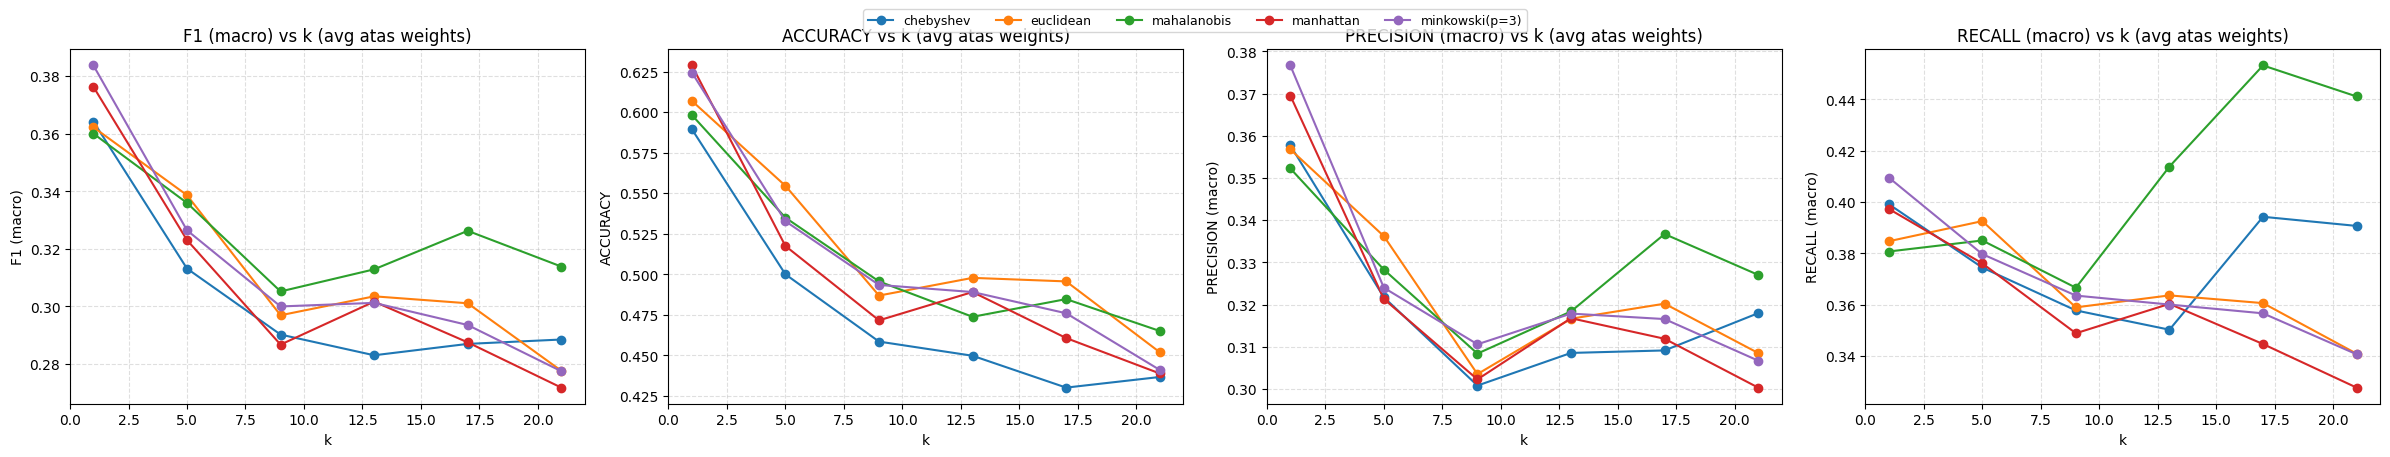

In [201]:
#@title kNN metric

df = eval_df_prepro.copy()

try:
    AVG_LBL = f" ({AVERAGE})" if isinstance(AVERAGE, str) else ""
except NameError:
    AVG_LBL = ""

def _metric_with_params(row):
    m = str(row.get("metric", ""))
    if m == "minkowski":
        p = row.get("p", np.nan)
        if pd.notna(p):
            p_str = str(int(p)) if float(p).is_integer() else f"{p:.3g}"
            return f"minkowski(p={p_str})"
    return m

if "metric" in df.columns:
    df["metric_label"] = df.apply(_metric_with_params, axis=1)
else:
    df["metric_label"] = "metric"

if "weights" not in df.columns:
    df["weights"] = "uniform"

score_cols = [c for c in ["f1", "accuracy", "precision", "recall"] if c in df.columns]
if not score_cols:
    raise ValueError("Tidak ada kolom skor ('f1','accuracy','precision','recall') di eval_df_prepro.")

fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 4.5))

if len(score_cols) == 1:
    axes = [axes]

for ax, score in zip(axes, score_cols):
    g = (df.groupby(["k", "metric_label"], as_index=False)[score]
           .mean()
           .sort_values(["metric_label", "k"]))
    for m in g["metric_label"].unique():
        d = g[g["metric_label"] == m]
        ax.plot(d["k"], d[score], marker="o", label=m)
    ax.set_xlabel("k")
    ylab = score.upper() + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_ylabel(ylab)
    ax.set_title(f"{ylab} vs k (avg atas weights)")
    ax.grid(True, linestyle="--", alpha=0.4)

handles, labels = axes[0].get_legend_handles_labels()
if labels:
    fig.legend(handles, labels, loc="upper center", ncol=min(6, len(labels)), bbox_to_anchor=(0.5, 1.02), fontsize=9)
fig.tight_layout()
plt.show()

Nah, dari grafik ini kita bisa mengambil beberapa informasi penting seperti:
- k kecil (≈1–5) masih paling tinggi untuk semua skor, tapi berisiko overfit. Saat k membesar, hampir semua metrik turun—kecuali Mahalanobis.
- Mahalanobis menjadi bintang baru dengan performanya di beberapa evaluasi metric dia terbukti unggul saat k nya mlai membesar.
- Manhattan/Euclidean sekarang menurun monoton saat k naik; keunggulan L1 yang terlihat pada data raw hilang setelah preprocessing.
- Minkowski p=3 & Chebyshev tampak paling labil/menurun → bukan kandidat utama pada data yang sudah dipreproses ini.
- Pada evaluasi F1-Score, Accuracy, Precision entah kenapa malah menurun, sedangkan yang Recall untuk yang chebysev dan mahalanobis nya naik.

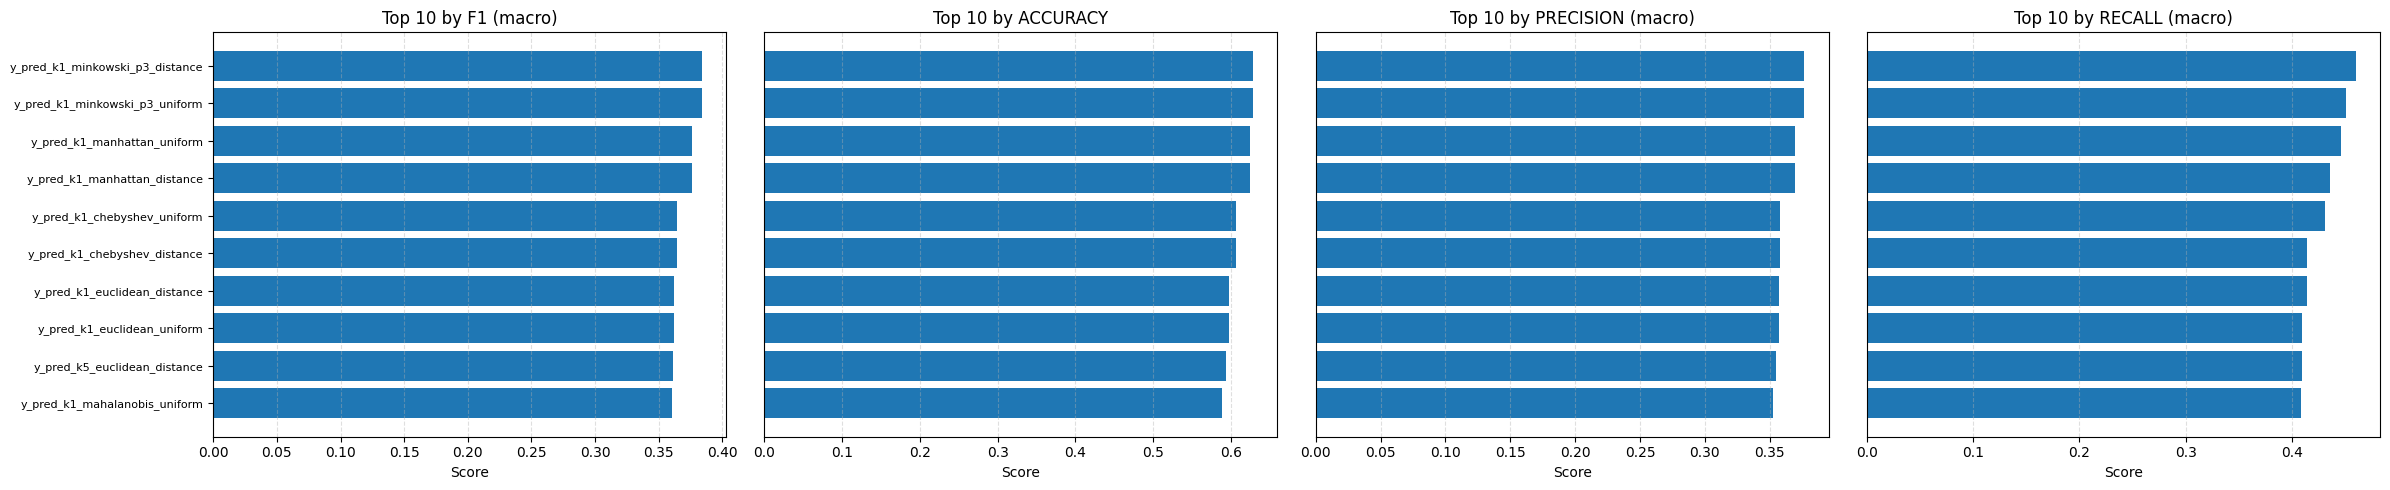

In [202]:
#@title top 10 score

TOPN = 10
fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 5))

if len(score_cols) == 1:
    axes = [axes]

for i, (ax, score) in enumerate(zip(axes, score_cols)):
    tmp = df.sort_values(score, ascending=False).head(TOPN).copy()
    ax.barh(tmp["name"][::-1], tmp[score][::-1])
    ttl = f"Top {TOPN} by {score.upper()}" + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_title(ttl)
    ax.set_xlabel("Score")
    if i == 0:
        ax.set_yticklabels(tmp["name"][::-1], fontsize=8)
    else:
        ax.set_yticks([])
    ax.grid(True, axis="x", linestyle="--", alpha=0.4)

fig.tight_layout()
plt.show()

Berdasarkan grafikk ini, bisa kita ambil beberapa informasi:
- Top-10 F1 & Accuracy didominasi k=1. Hampir semua bar di dua panel kiri bertipe k1_* (beragam metrik & weights). Artinya, setelah preprocessing, decision boundary lokal sangat membantu; smoothing (k besar) justru menurunkan skor.
- Minkowski p=3 dan Manhattan paling sering di F1. Keduanya bersaing ketat; Euclidean juga muncul, Chebyshev sesekali. Mahalanobis jarang di Top-10 F1/Acc pada k=1—wajar, Mahalanobis butuh agregasi tetangga untuk “mengaktifkan” informasi kovarians.
- Top-10 Recall lebih tinggi (≈0.43–0.45) dan tidak hanya k=1. Ini konsisten dengan grafik garis sebelumnya: Mahalanobis pada k besar (≈17–21) mengangkat recall (menangkap lebih banyak kelas minoritas), walau F1/Acc tidak selalu terbaik.
- Peran weights. Banyak entri Top-10 F1/Acc bertuliskan distance dan uniform—tetapi itu karena k=1 membuat weights tak berpengaruh. Begitu k>1, biasanya distance unggul (terlihat di analisis per-weights sebelumnya).

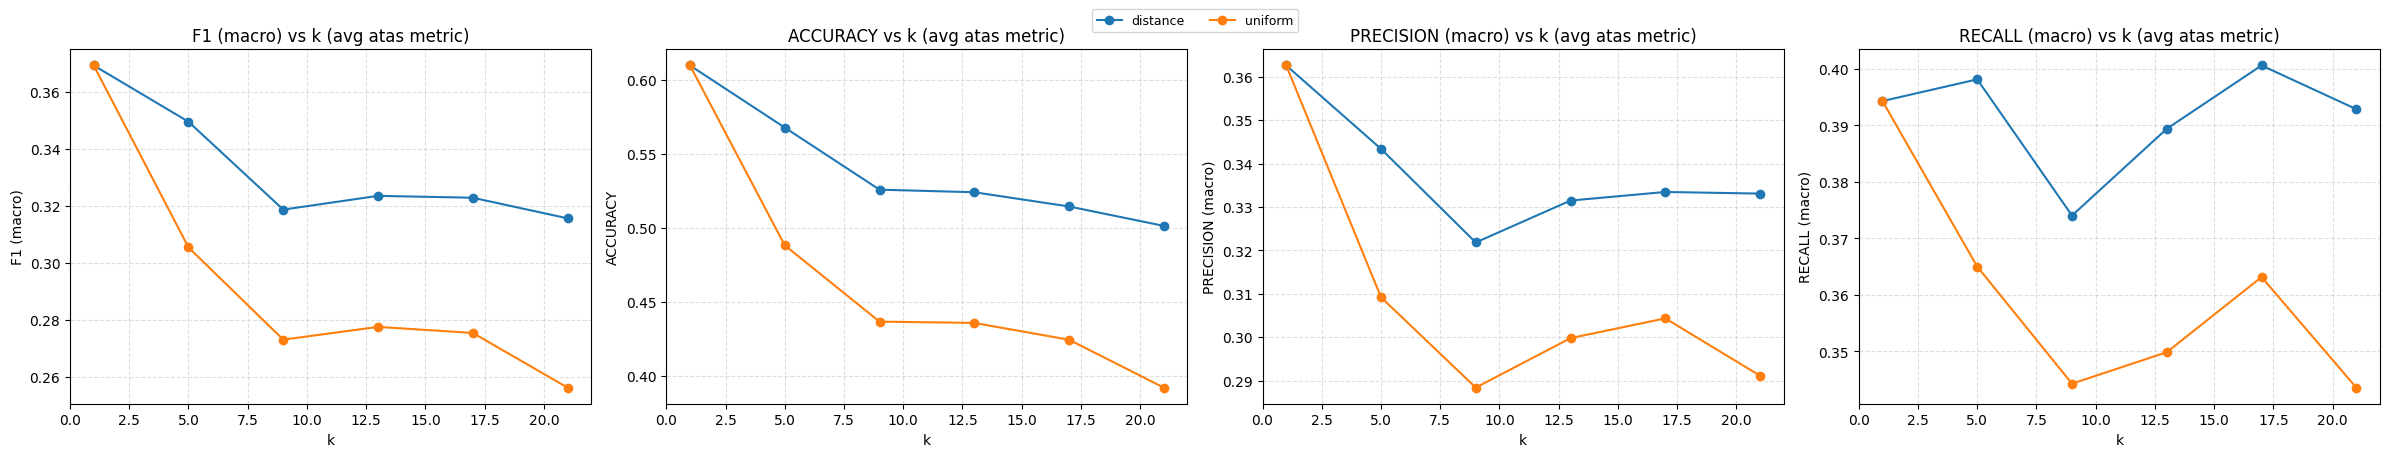

In [203]:
#@title Score vs k-weight

fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 4.5))
if len(score_cols) == 1:
    axes = [axes]

for ax, score in zip(axes, score_cols):
    g_w = (df.groupby(["k", "weights"], as_index=False)[score]
             .mean()
             .sort_values(["weights", "k"]))
    for w in g_w["weights"].unique():
        d = g_w[g_w["weights"] == w]
        ax.plot(d["k"], d[score], marker="o", label=w)
    ylab = score.upper() + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_xlabel("k")
    ax.set_ylabel(ylab)
    ax.set_title(f"{ylab} vs k (avg atas metric)")
    ax.grid(True, linestyle="--", alpha=0.4)

handles, labels = axes[0].get_legend_handles_labels()
if labels:
    fig.legend(handles, labels, loc="upper center",
               ncol=min(6, len(labels)), bbox_to_anchor=(0.5, 1.02), fontsize=9)
fig.tight_layout()
plt.show()

Untuk grafik ini masih sama dengan yang di data mentah yaitu yang unggul adalah distance dibanding uniform. Nah tapi disini yang menarik adalah grafik nya yang mayoritas cenderung untuk menurun dibanding yang di data mentah tadi.

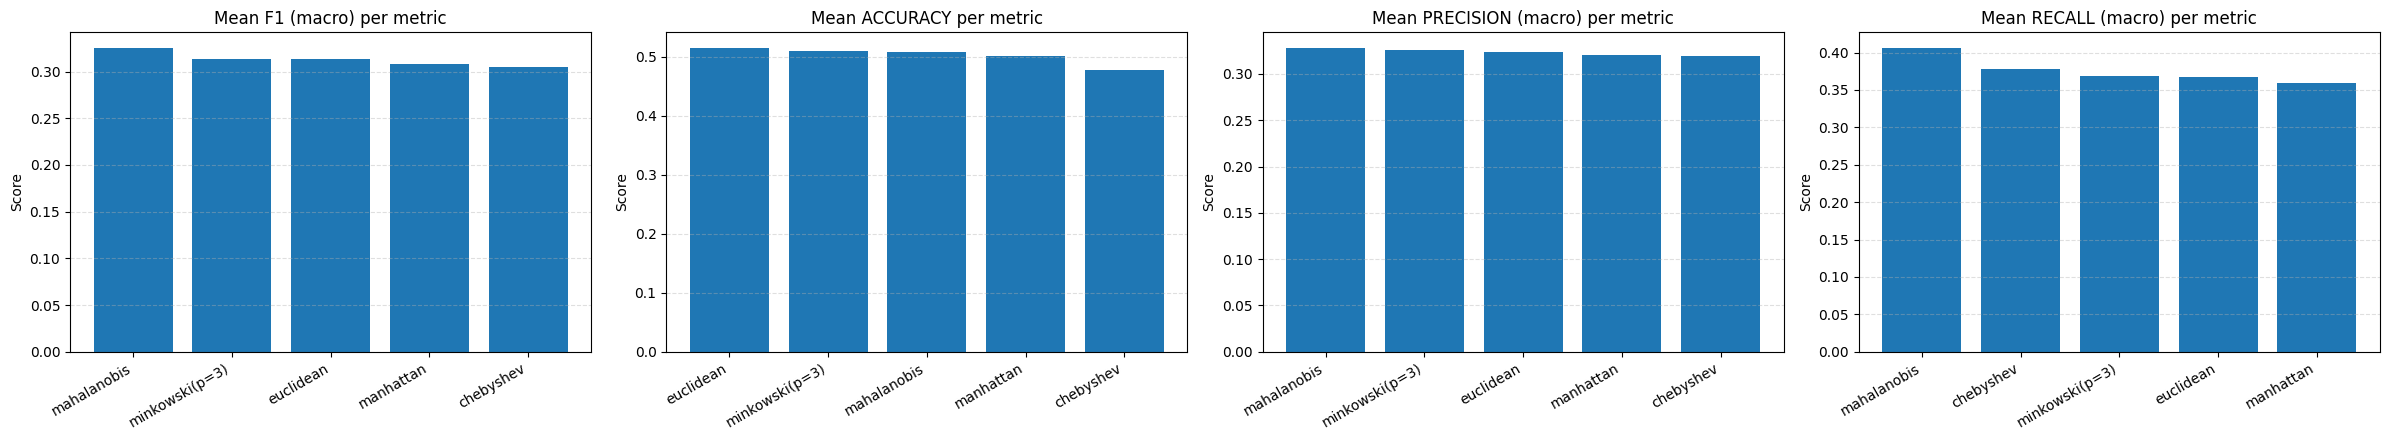

In [204]:
#@title mean score per metric

fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 4.5))
if len(score_cols) == 1:
    axes = [axes]

for ax, score in zip(axes, score_cols):
    avg_m = (df.groupby("metric_label")[score]
               .mean()
               .sort_values(ascending=False))
    ax.bar(avg_m.index, avg_m.values)
    ttl = f"Mean {score.upper()}" + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_title(ttl + " per metric")
    ax.set_ylabel("Score")
    ax.set_xticklabels(avg_m.index, rotation=30, ha="right")
    ax.grid(True, axis="y", linestyle="--", alpha=0.4)

fig.tight_layout()
plt.show()

Untuk rata" skor evaluasinya dari yang di data mentah yang mendominasi adalah manhattan, sekarang di data preprocess yang mendominasi adalah mahalanobis dengan unggul di tiga metric yaitu F1-Score, Precision, dan Recall.

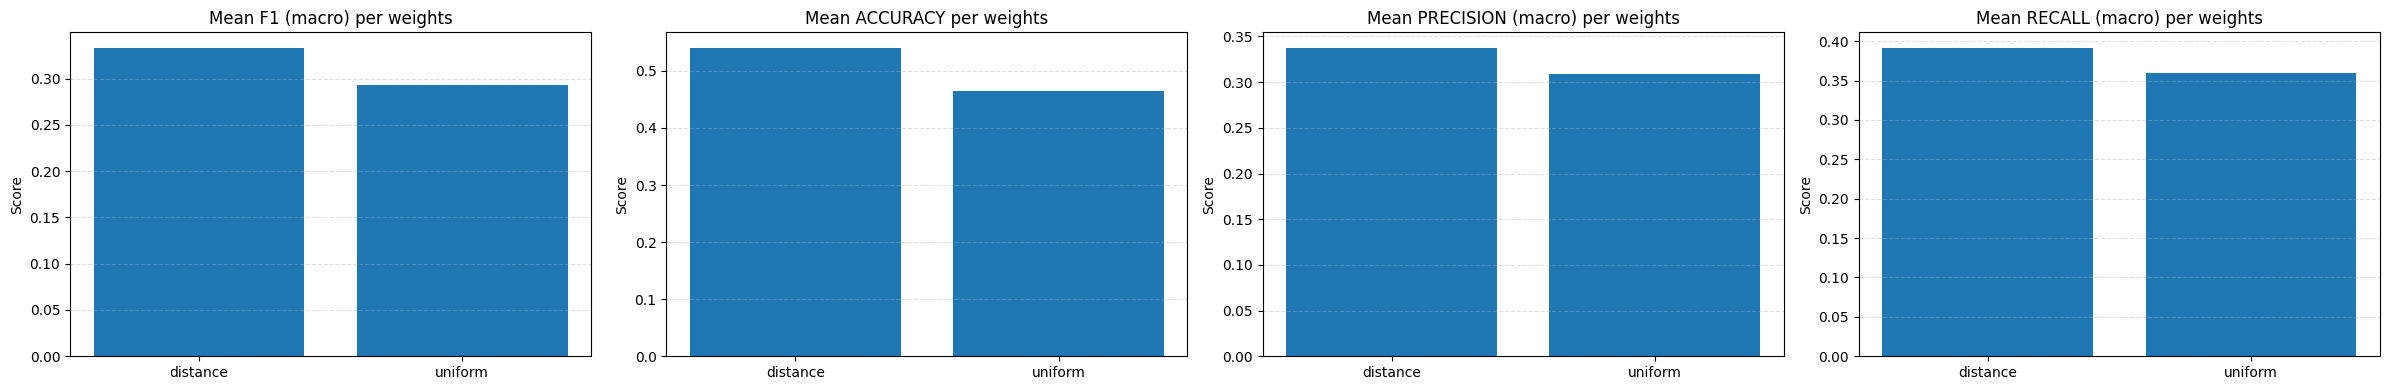

In [205]:
#@title mean score per weight

fig, axes = plt.subplots(1, len(score_cols), figsize=(6 * len(score_cols), 4.0))
if len(score_cols) == 1:
    axes = [axes]

for ax, score in zip(axes, score_cols):
    avg_w = (df.groupby("weights")[score]
               .mean()
               .sort_values(ascending=False))
    ax.bar(avg_w.index, avg_w.values)
    ttl = f"Mean {score.upper()}" + (AVG_LBL if score in ["f1", "precision", "recall"] else "")
    ax.set_title(ttl + " per weights")
    ax.set_ylabel("Score")
    ax.grid(True, axis="y", linestyle="--", alpha=0.4)

fig.tight_layout()
plt.show()

Nah, disini bisa kita lihat kalau yang mendominasi masih distance dibanding uniform.

## Kesimpulan

Singkatnya, pola besarnya yaitu begini: di data mentah, k-NN paling stabil pakai Manhattan + weights=distance dengan k menengah–besar (±13–21). Ada “drop” di k≈5 lalu pulih ketika k dinaikkan, dan Chebyshev konsisten paling lemah. Distance weighting jelas membantu begitu k>1.

Begitu data dipreproses (z-score, pembersihan), batas kelas jadi lebih “tajam” di lokal: k=1 langsung mendominasi F1 dan Accuracy (Minkowski p=3/Manhattan unggul tipis). Tapi kalau prioritasmu Recall, pemenangnya justru Mahalanobis pada k besar (±17–21)—di sini efek informasi kovarians mulai terasa, recall naik tanpa menjatuhkan precision terlalu dalam.

Jadi, untuk tujuan umum/imbangan skor, mulai dari k=1, metric=Manhattan (atau Minkowski p=3); kalau targetmu menangkap sebanyak mungkin kelas minoritas, beralih ke Mahalanobis + weights=distance, k≈17–21. Apapun pilihannya, distance weighting layak dipakai untuk k>1, dan sebaiknya dikunci lewat Stratified K-Fold (cek mean±std) biar bukan kebetulan. Bila pakai Mahalanobis, pertimbangkan Ledoit–Wolf (shrinkage) untuk kovarians agar lebih stabil.

Sekian notebook dari saya, terimakasihh...